---

## 空調マスタデータを読み込んでデータを集計する部分


In [9]:
import pandas as pd

In [10]:
hvac_master = pd.read_excel("./data/master/MASTER_Clea.xlsx", sheet_name=None)
hvac_master.keys()

dict_keys(['NEW_MASTER', 'MASTER', '制御マスタ', 'original'])

In [1]:
from service.ppo_train import AircontrolPPOTrainConfig, AircontrolPPOTrainer

In [2]:
cfg = AircontrolPPOTrainConfig()
cfg.log_dir_root = cfg.log_dir_root.format(area="Ken")

### タスク

- エリア毎の目標室内温度を取得
- 設定温度の範囲を取得する


In [23]:
master = hvac_master.get("MASTER").set_index(keys="制御区分", drop=True)
master.index = master.index.str.replace(r"\s+", "", regex=True)

In [ ]:
from input_info.crea_building_information import CreaBuilding
from deep_reinforcement_learning.environment.prediction.model import load_residual_model

In [25]:
area_master = master.loc[area_name, :]

,始業時間,就業時間,目標室内温度,設定温度下限,設定温度上限,風量候補,電力予測区分,PM Mesh ID,PM Addr ID,実績電力,電力変数キー,環境予測区分,環境変数キー,実績設定温度,実績室内温度,実績運転,実績モード,実績風量
制御区分,,,,,,,,,,,,,,,,,,
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-1,49,1,Phase A,{PM Mesh ID}-{PM Addr ID},E-16北4,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-2,49,2,Phase A,{PM Mesh ID}-{PM Addr ID},E-15北3,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-3,49,3,Phase A,{PM Mesh ID}-{PM Addr ID},E-12南4,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-4,49,4,Phase A,{PM Mesh ID}-{PM Addr ID},E-11南3,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-4,49,4,Phase A,{PM Mesh ID}-{PM Addr ID},E-14北2,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-6,49,6,Phase A,{PM Mesh ID}-{PM Addr ID},E-13北1,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-7,49,7,Phase A,{PM Mesh ID}-{PM Addr ID},E-10南2,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed
Area1,07:30:00,20:00:00,22.5,19,26,"Low,Medium,High",49-8,49,8,Phase A,{PM Mesh ID}-{PM Addr ID},E-9南1,A/C Name,A/C Set Temperature,Indoor Temp.,A/C ON/OFF,A/C Mode,A/C Fan Speed


In [47]:
def extract_set_and_target_from_cols(unit_df, room_names):
    unit_temp_range_list = []
    target_temp_list = []
    for room in room_names:
        set_low = unit_df.loc[unit_df["環境予測区分"] == room, "設定温度下限"].iloc[0]
        set_high = unit_df.loc[unit_df["環境予測区分"] == room, "設定温度上限"].iloc[0]
        target = unit_df.loc[unit_df["環境予測区分"] == room, "目標室内温度"].iloc[0]
        unit_temp_range_list.append((set_low, set_high))
        target_temp_list.append(target)
    return unit_temp_range_list, target_temp_list

In [ ]:
building = CreaBuilding()
area_name = "Area1"
elec_model_dir = "./models/{area}__kwh.joblib"
temp_model_dir = "./models/{area}__temp.joblib"

area_master = master.loc[area_name]
elec_model = load_residual_model(elec_model_dir.format(area=area_name))

In [44]:
indoor_mode_columns = CreaBuilding.pick_cols(elec_model.x_cols, "A/C Mode")
room_list = [c.split("__")[-1] for c in indoor_mode_columns]

In [59]:
room_list

['E-10南2', 'E-11南3', 'E-12南4', 'E-13北1', 'E-14北2', 'E-15北3', 'E-16北4', 'E-9南1']

In [ ]:
unit_temp_range_list, target_temp_list = extract_set_and_target_from_cols(
    area_master, room_list
)

In [58]:
elec_model.x_cols

['hour',
 'month',
 'weekday',
 'is_weekend',
 'lag1h__Indoor Temp.__E-10南2',
 'lag1h__Indoor Temp.__E-11南3',
 'lag1h__Indoor Temp.__E-12南4',
 'lag1h__Indoor Temp.__E-13北1',
 'lag1h__Indoor Temp.__E-14北2',
 'lag1h__Indoor Temp.__E-15北3',
 'lag1h__Indoor Temp.__E-16北4',
 'lag1h__Indoor Temp.__E-9南1',
 'Outdoor Temp.',
 'Outdoor Humidity',
 'Diff1h_Outdoor Temp.',
 'Diff1h_Outdoor Humidity',
 'A/C Set Temperature__E-10南2',
 'A/C Set Temperature__E-11南3',
 'A/C Set Temperature__E-12南4',
 'A/C Set Temperature__E-13北1',
 'A/C Set Temperature__E-14北2',
 'A/C Set Temperature__E-15北3',
 'A/C Set Temperature__E-16北4',
 'A/C Set Temperature__E-9南1',
 'A/C Mode__E-10南2',
 'A/C Mode__E-11南3',
 'A/C Mode__E-12南4',
 'A/C Mode__E-13北1',
 'A/C Mode__E-14北2',
 'A/C Mode__E-15北3',
 'A/C Mode__E-16北4',
 'A/C Mode__E-9南1',
 'A/C Fan Speed__E-10南2',
 'A/C Fan Speed__E-11南3',
 'A/C Fan Speed__E-12南4',
 'A/C Fan Speed__E-13北1',
 'A/C Fan Speed__E-14北2',
 'A/C Fan Speed__E-15北3',
 'A/C Fan Speed__E-16北4',
 'A

In [56]:
CreaBuilding.get_columns_by_area_units(base_df, area_name)

['A/C Set Temperature__E-10南2',
 'A/C Set Temperature__E-11南3',
 'A/C Set Temperature__E-12南4',
 'A/C Set Temperature__E-13北1',
 'A/C Set Temperature__E-14北2',
 'A/C Set Temperature__E-15北3',
 'A/C Set Temperature__E-16北4',
 'A/C Set Temperature__E-9南1',
 'Indoor Temp.__E-10南2',
 'Indoor Temp.__E-11南3',
 'Indoor Temp.__E-12南4',
 'Indoor Temp.__E-13北1',
 'Indoor Temp.__E-14北2',
 'Indoor Temp.__E-15北3',
 'Indoor Temp.__E-16北4',
 'Indoor Temp.__E-9南1',
 'A/C Mode__E-10南2',
 'A/C Mode__E-11南3',
 'A/C Mode__E-12南4',
 'A/C Mode__E-13北1',
 'A/C Mode__E-14北2',
 'A/C Mode__E-15北3',
 'A/C Mode__E-16北4',
 'A/C Mode__E-9南1',
 'A/C Fan Speed__E-10南2',
 'A/C Fan Speed__E-11南3',
 'A/C Fan Speed__E-12南4',
 'A/C Fan Speed__E-13北1',
 'A/C Fan Speed__E-14北2',
 'A/C Fan Speed__E-15北3',
 'A/C Fan Speed__E-16北4',
 'A/C Fan Speed__E-9南1',
 'A/C ON/OFF__E-10南2',
 'A/C ON/OFF__E-11南3',
 'A/C ON/OFF__E-12南4',
 'A/C ON/OFF__E-13北1',
 'A/C ON/OFF__E-14北2',
 'A/C ON/OFF__E-15北3',
 'A/C ON/OFF__E-16北4',
 'A/C ON/OF

---

### このコードは、指定したエリアの室内温度, 室外機の消費電力りょうを予測する処理をデバッグする<br>

入力情報:

- 時間特徴量
- 1 時間前の室内温度
- 室内機の制御情報
- 室内機の制御情報をもとに特徴量エンジニアリングを施した情報
- 天気情報
- 1 時間前かた天気情報が変化した変動量

出力情報:

- 室内温度
- 室外機の消費電力量


### モジュール取得


In [54]:
import pandas as pd
from service.prediction import AreaHVACModelManager

### 入力値取得


In [55]:
base_df = pd.read_csv("data/base/hourly_filled.csv")
base_df["Datetime_hour"] = pd.to_datetime(base_df["Datetime_hour"])
base_df = base_df.set_index("Datetime_hour", drop=True)

In [3]:
AreaModelApi = AreaHVACModelManager()
AreaModelApi.set_origin_data(base_df)
area_unit_names = AreaModelApi.area_info

Area1 の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 80), Y_temp:(10896, 8))
    → 温度モデルの残差メトリクス / 重要度プロット


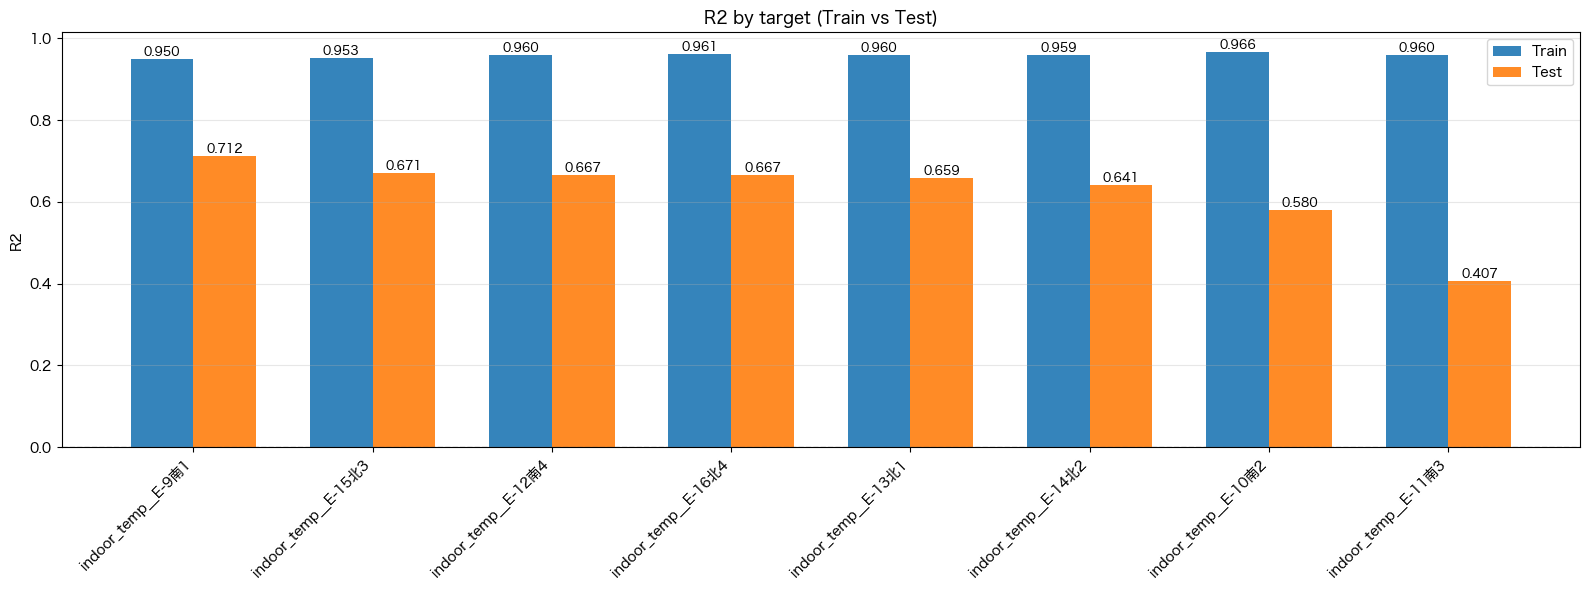

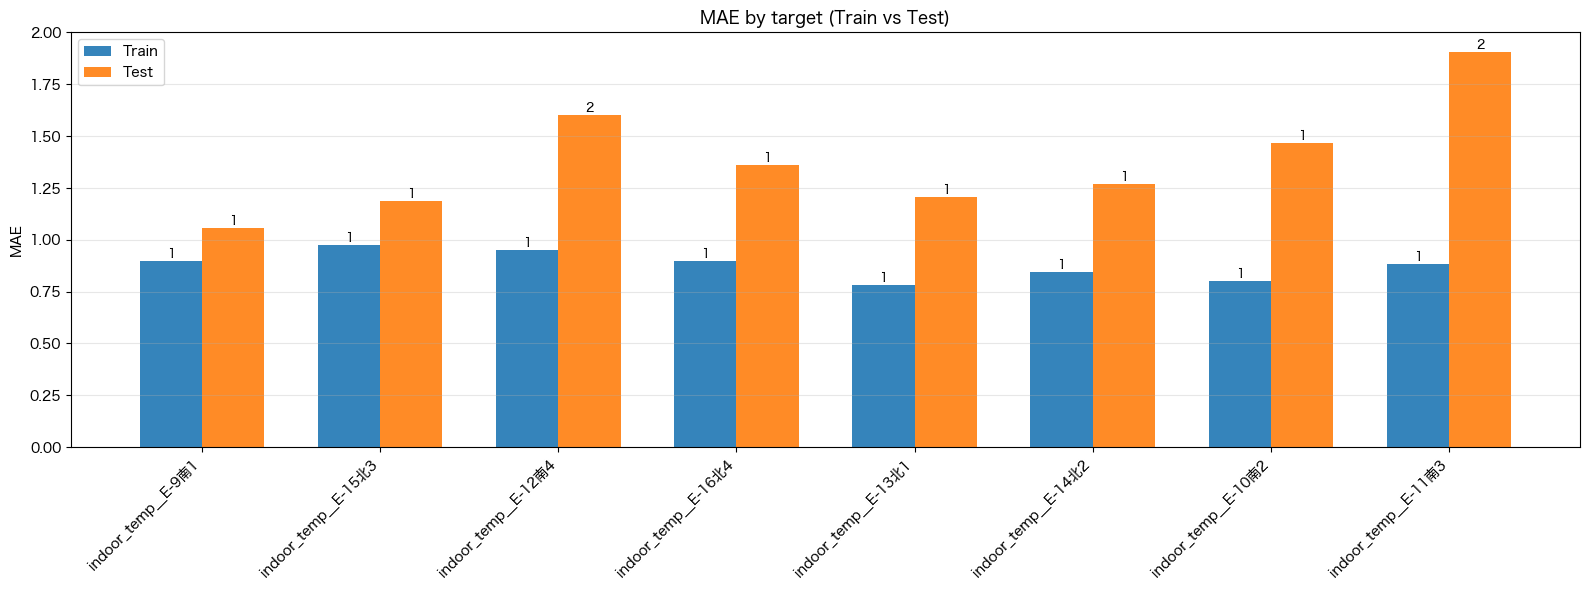

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  Step2: 消費電力モデル学習 (X:(10703, 88), Y_kwh:(10896, 7))
    → 消費電力モデルの残差メトリクス / 重要度プロット


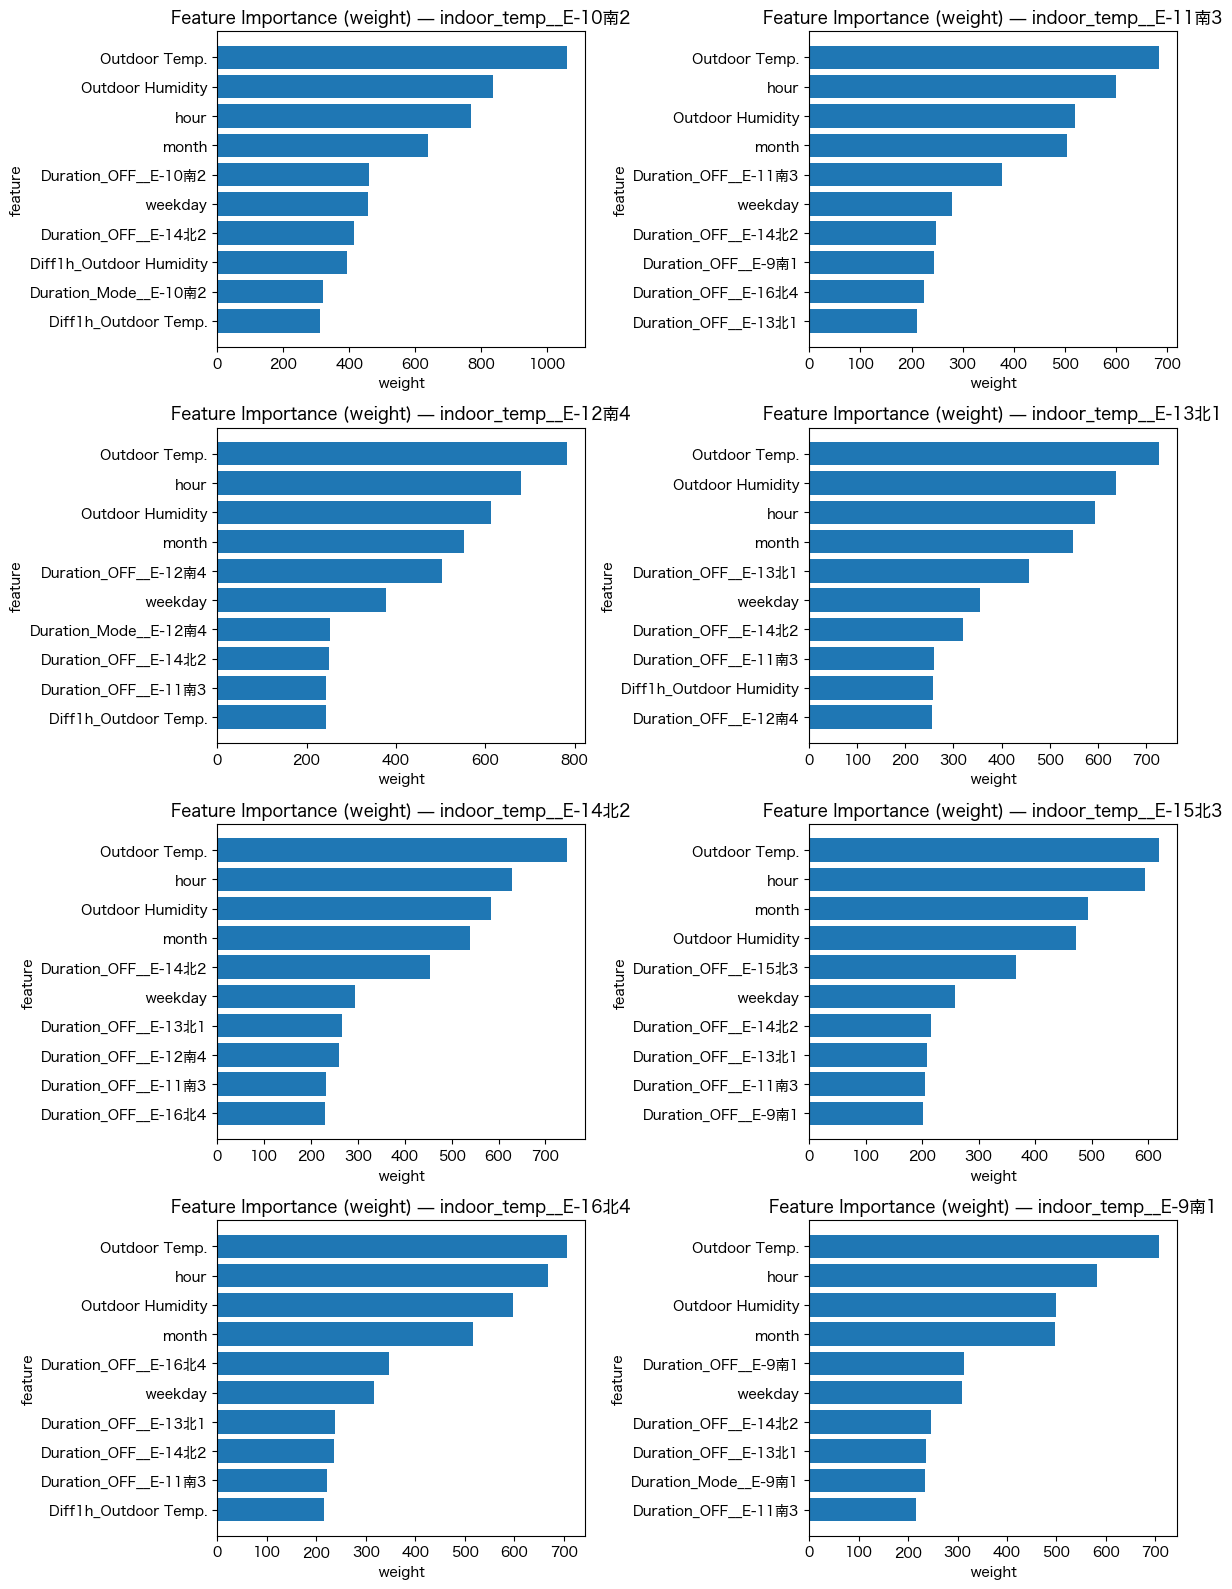

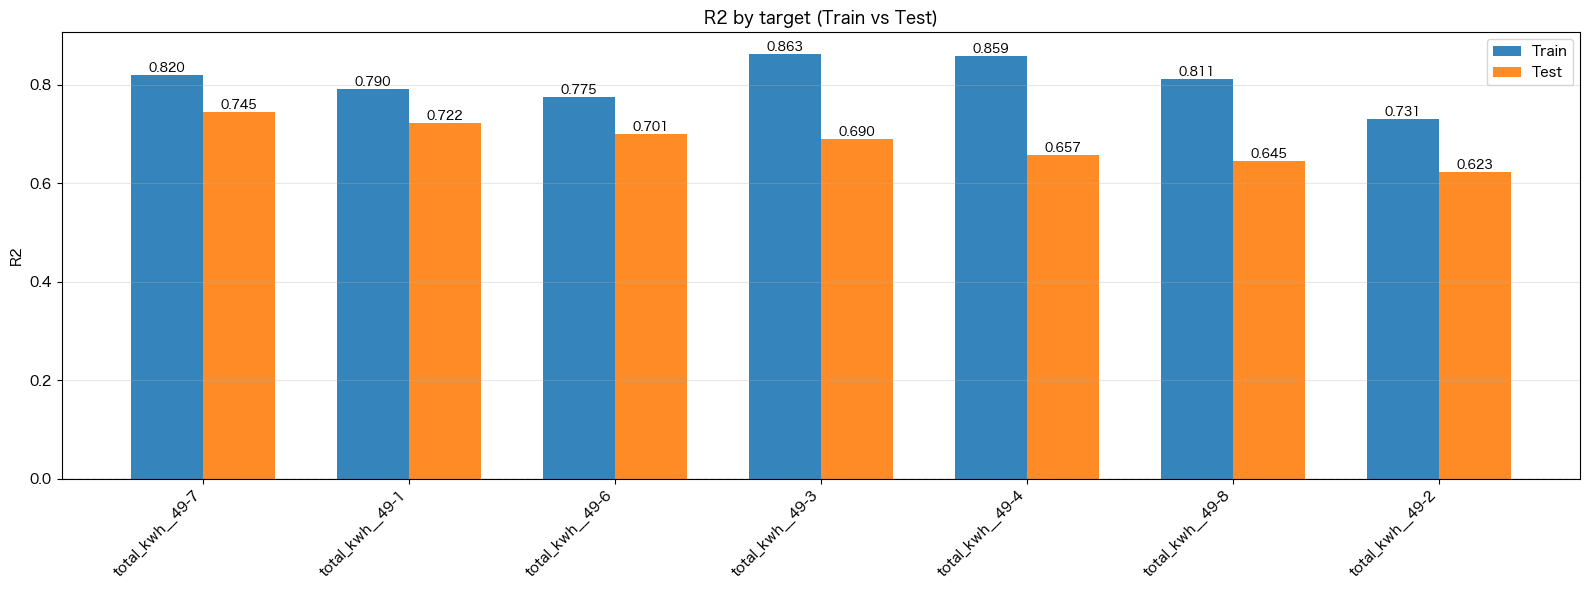

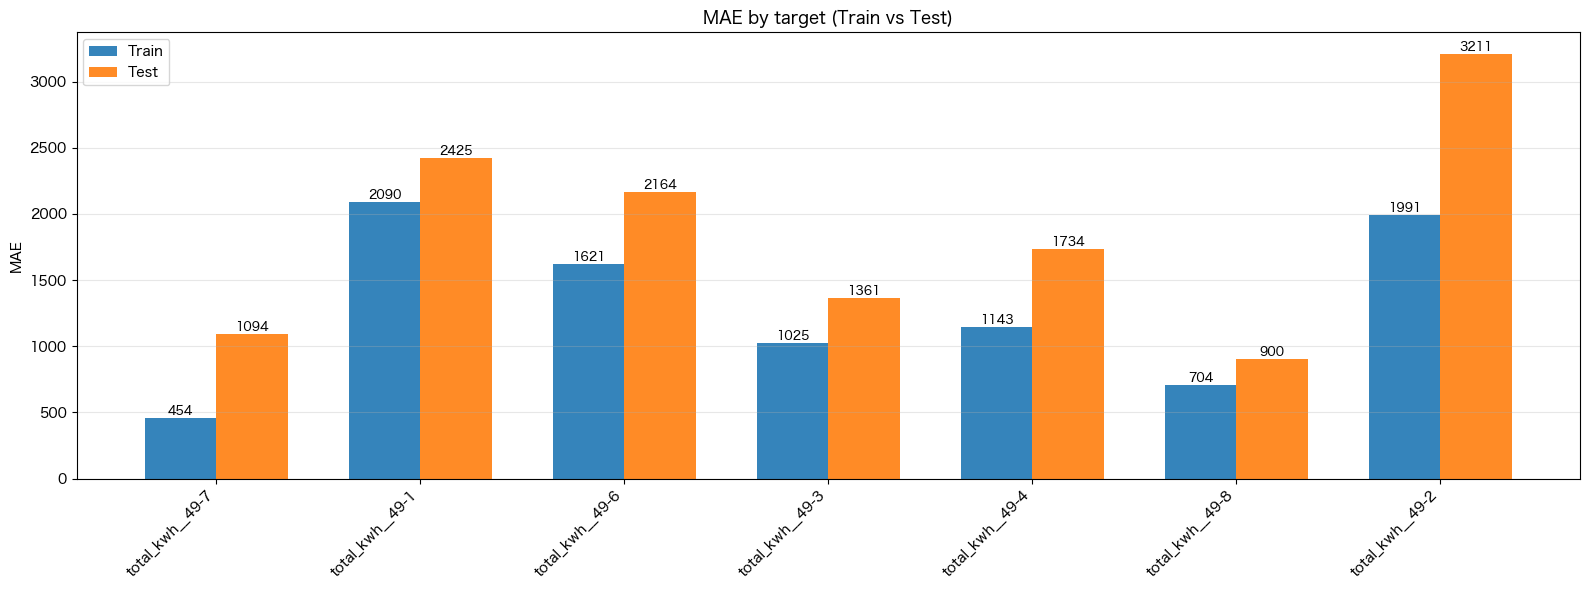

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Area2 の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 62), Y_temp:(10896, 6))
    → 温度モデルの残差メトリクス / 重要度プロット


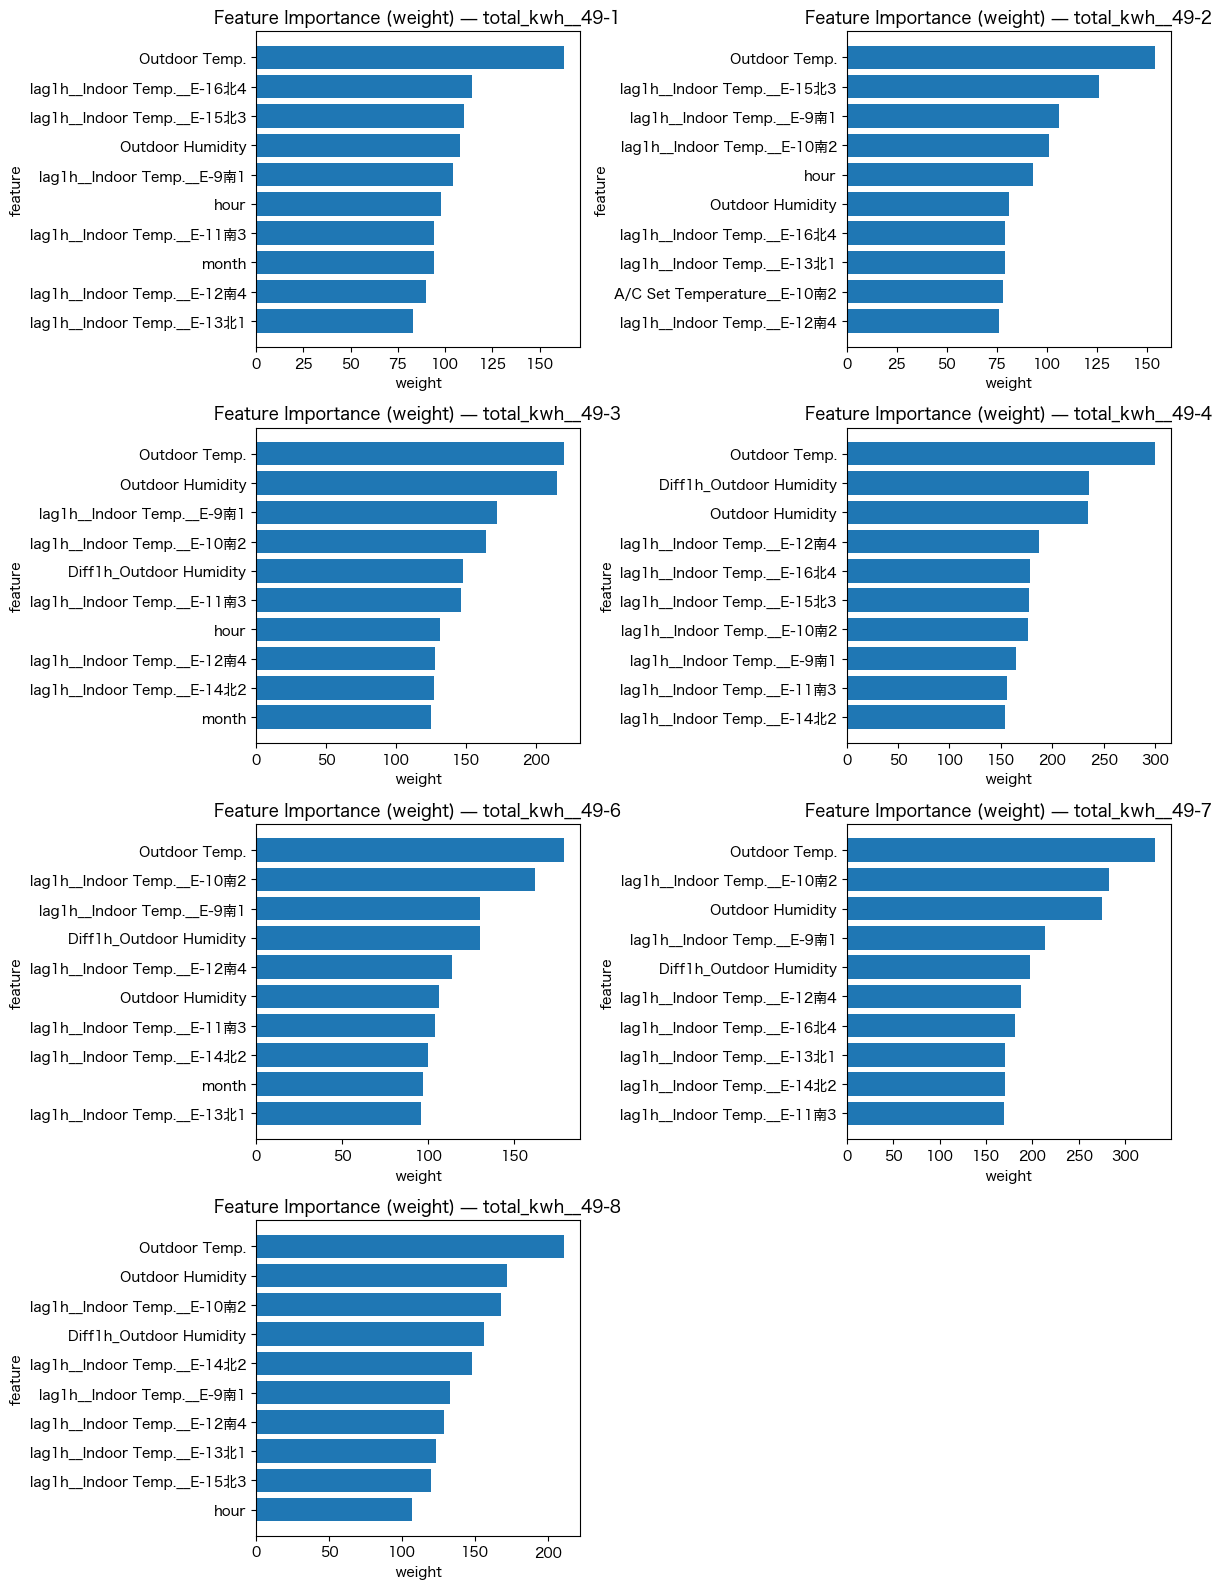

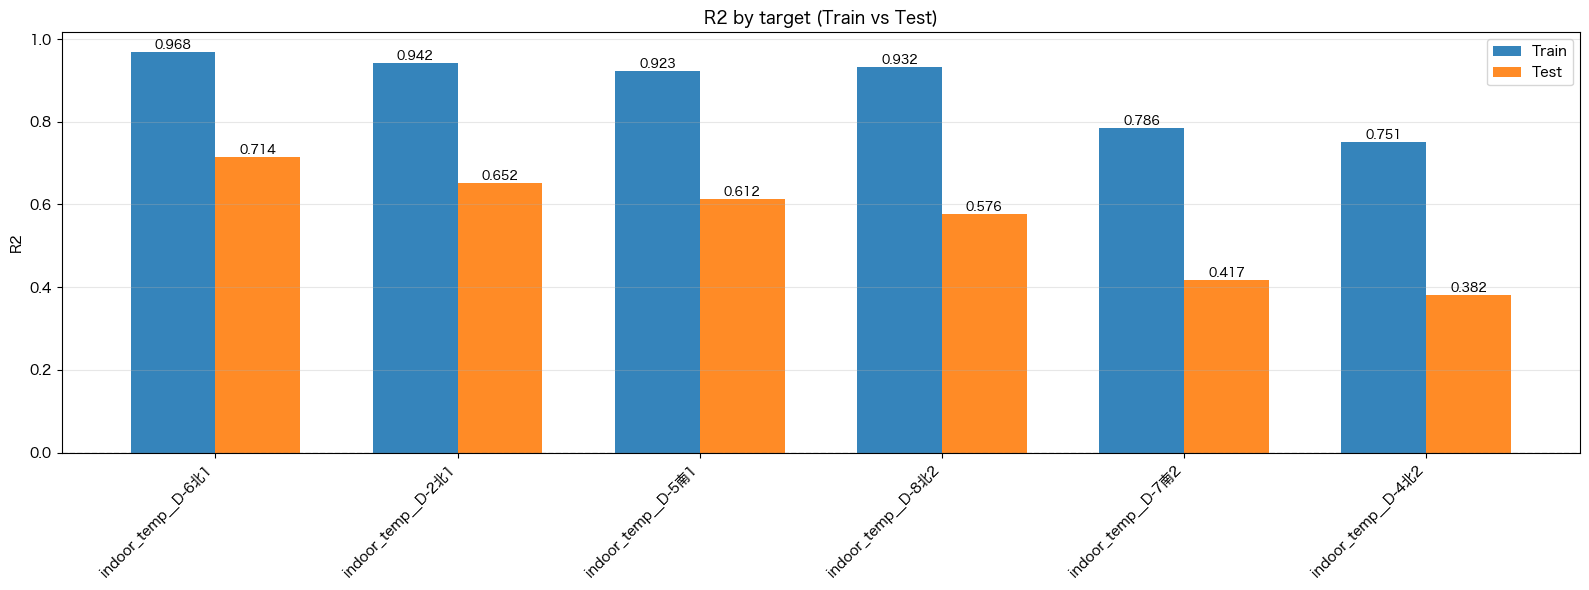

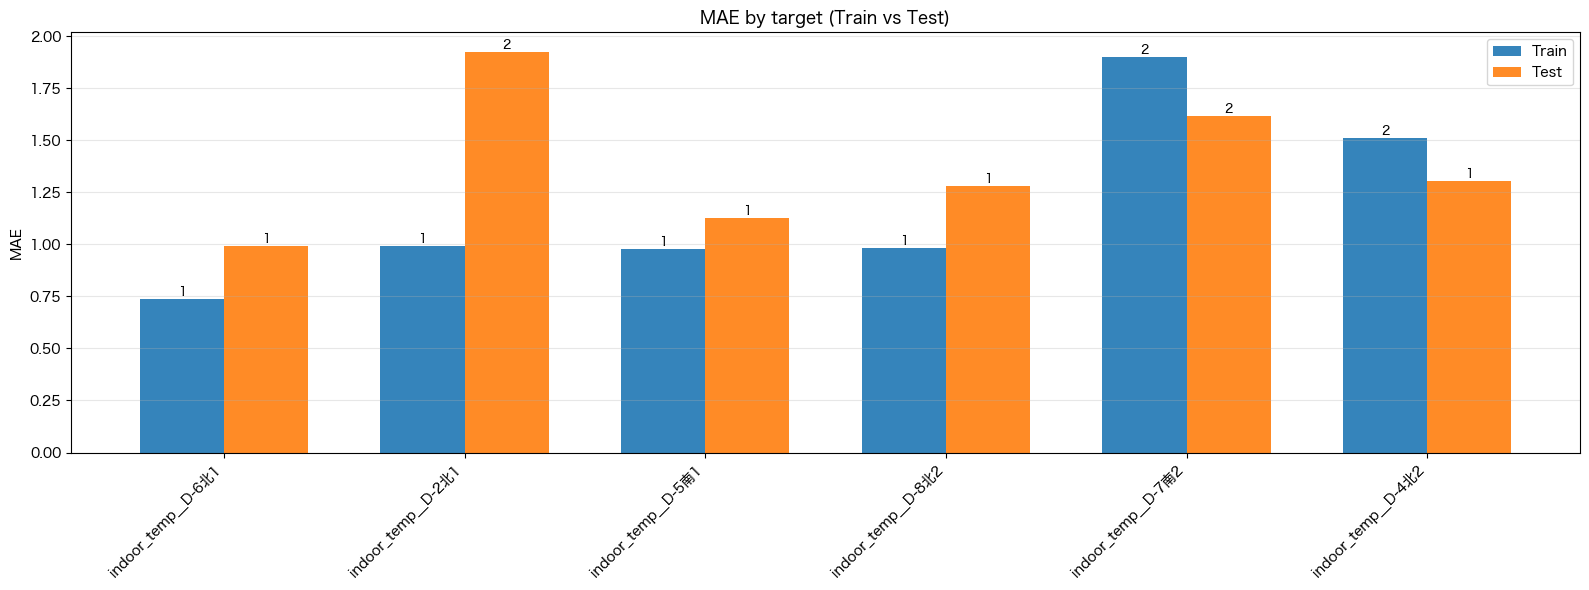

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  Step2: 消費電力モデル学習 (X:(10703, 68), Y_kwh:(10896, 6))
    → 消費電力モデルの残差メトリクス / 重要度プロット


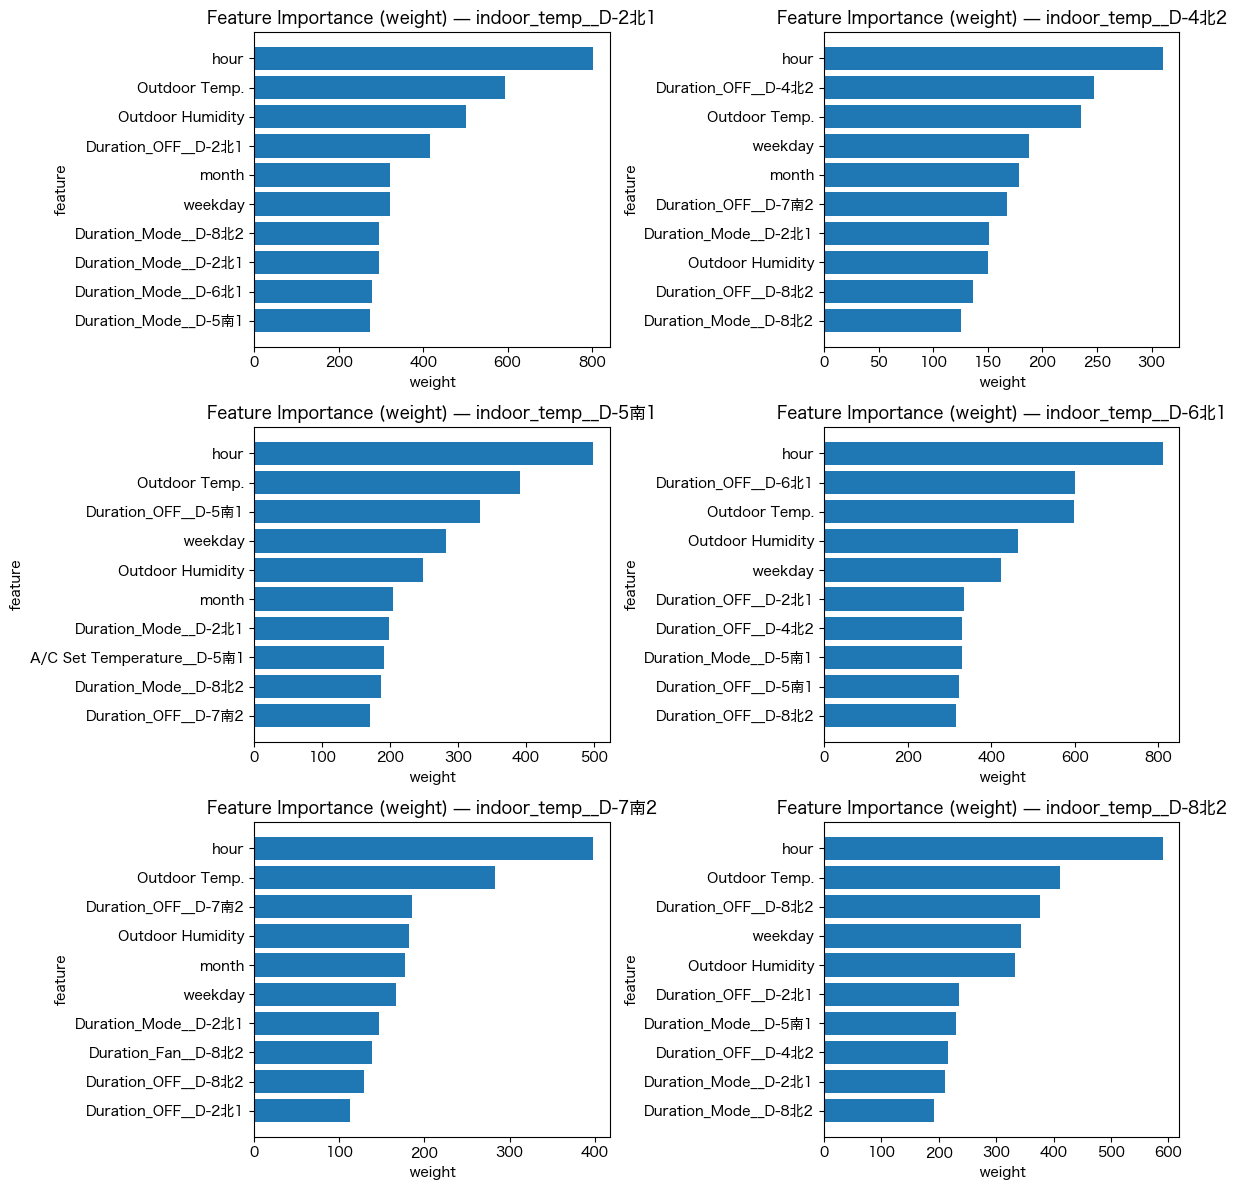

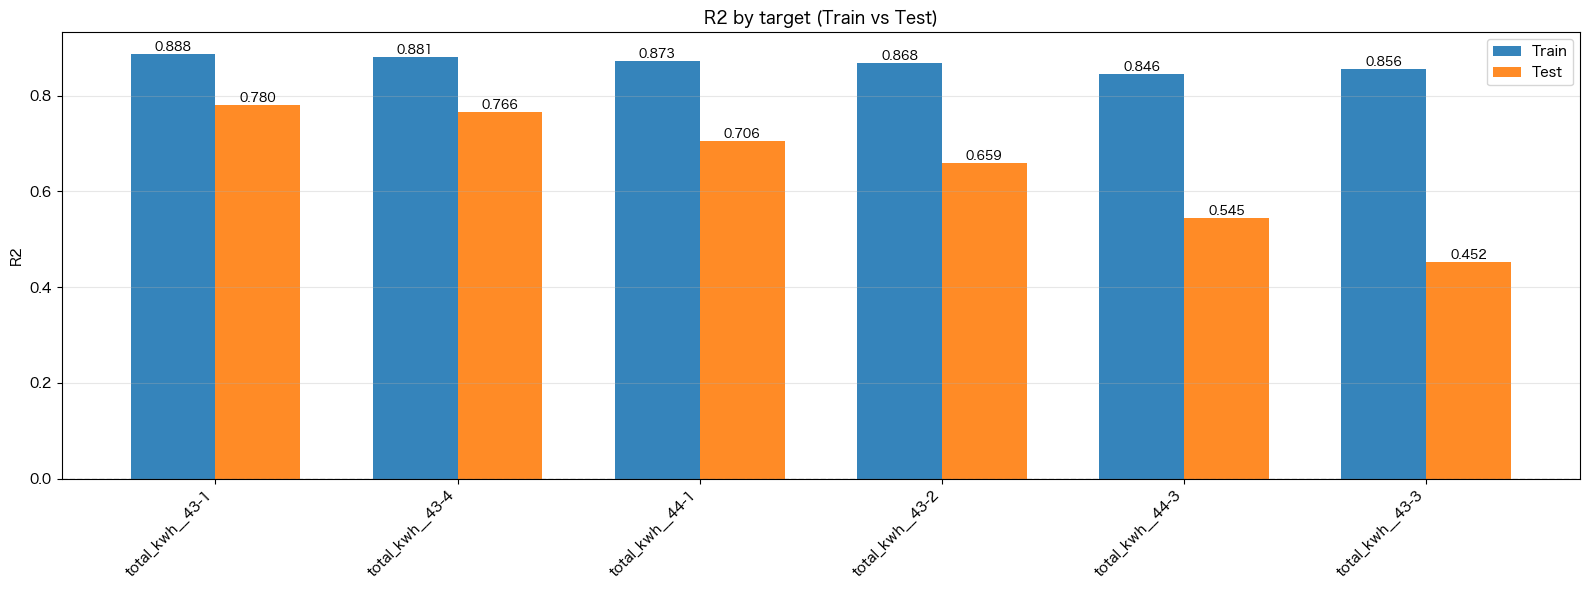

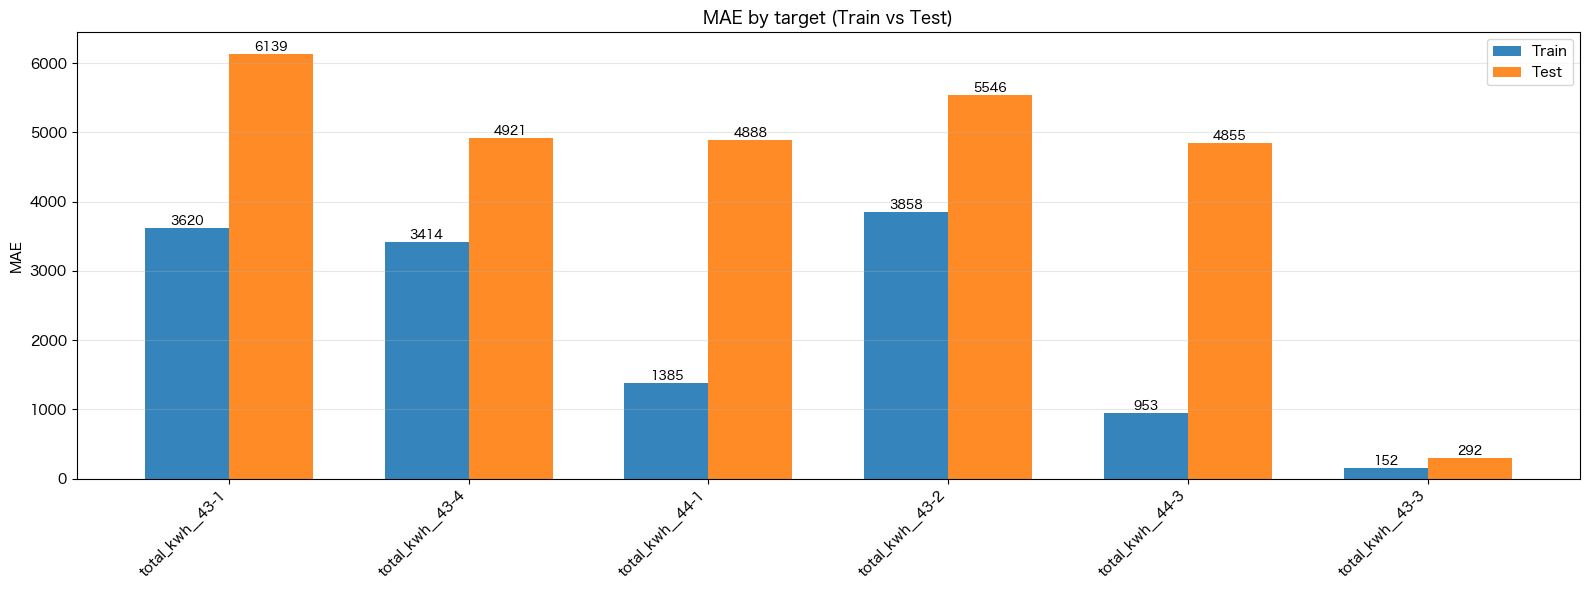

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Area3 の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 26), Y_temp:(10896, 2))
    → 温度モデルの残差メトリクス / 重要度プロット


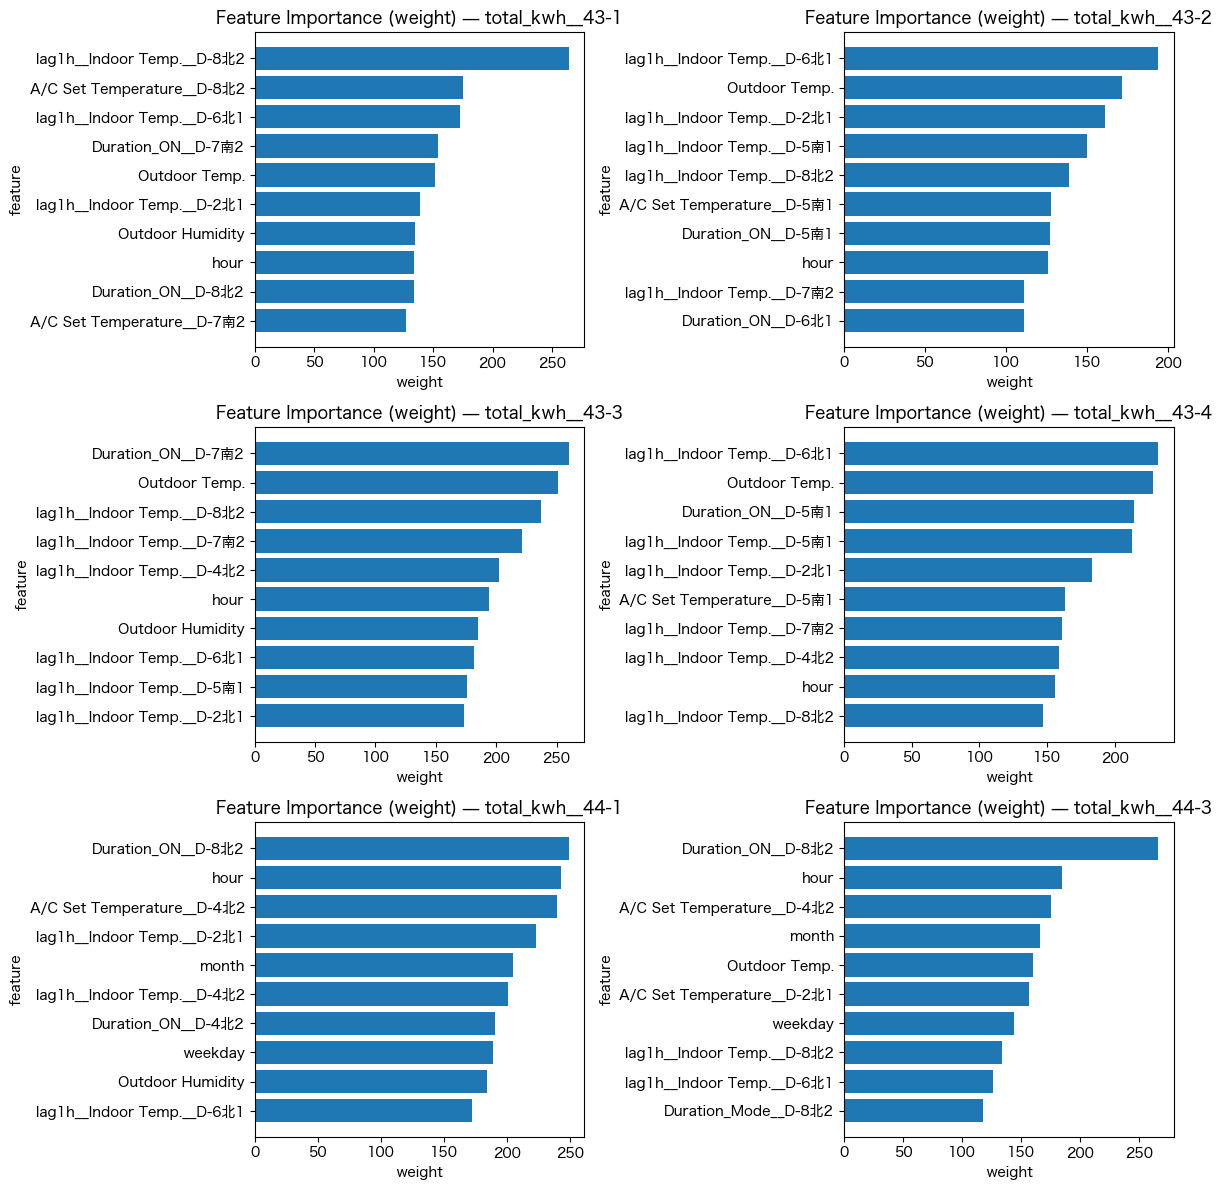

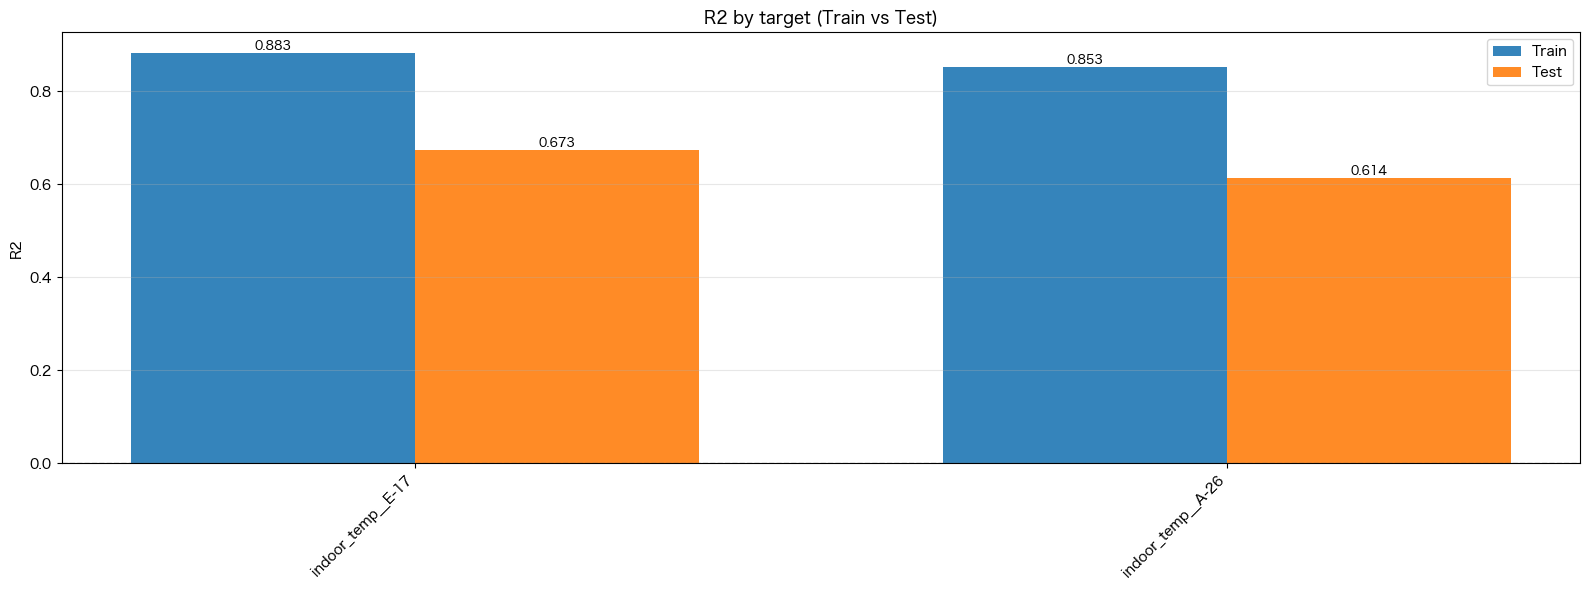

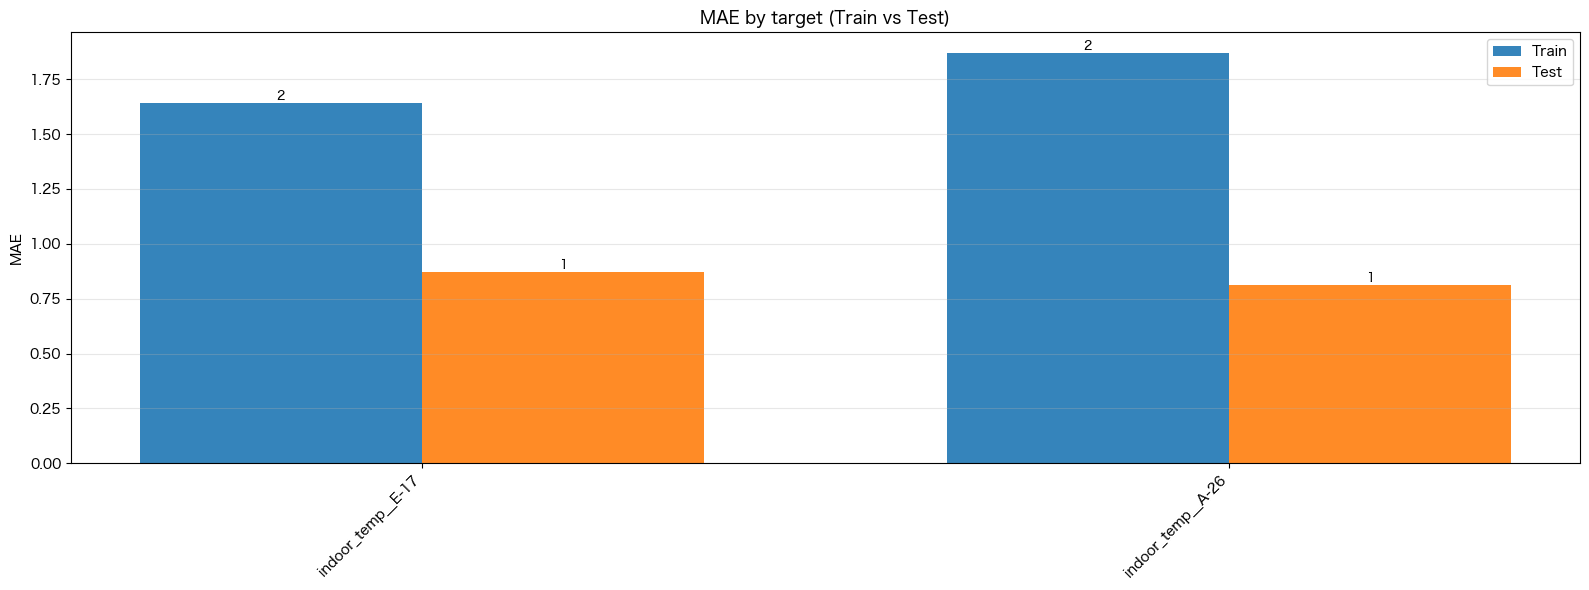

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  Step2: 消費電力モデル学習 (X:(10703, 28), Y_kwh:(10896, 1))
    → 消費電力モデルの残差メトリクス / 重要度プロット


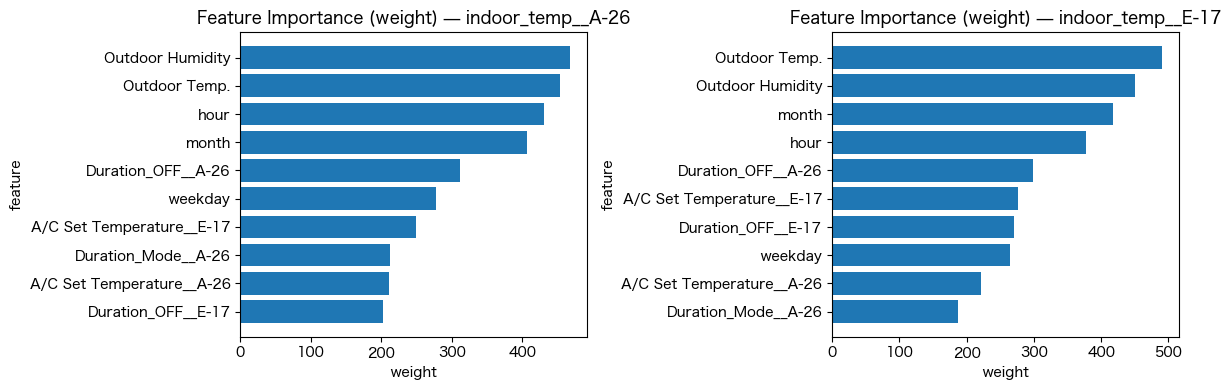

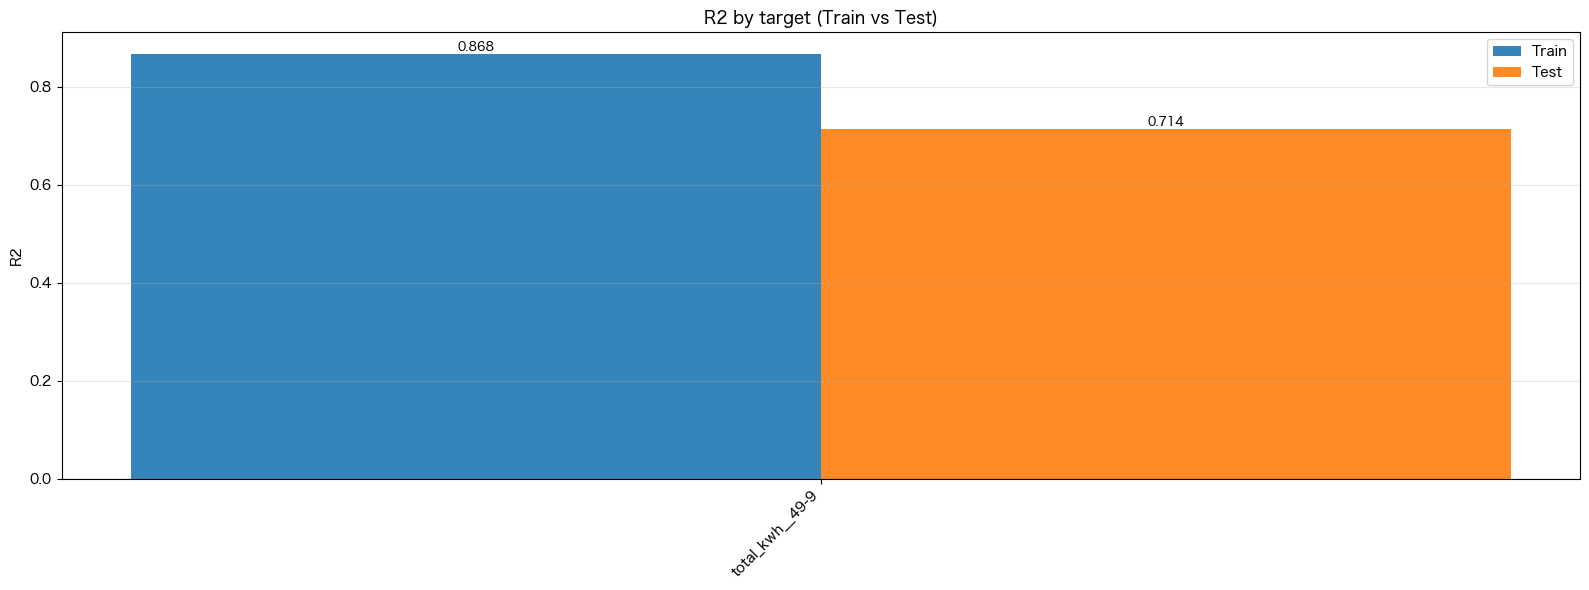

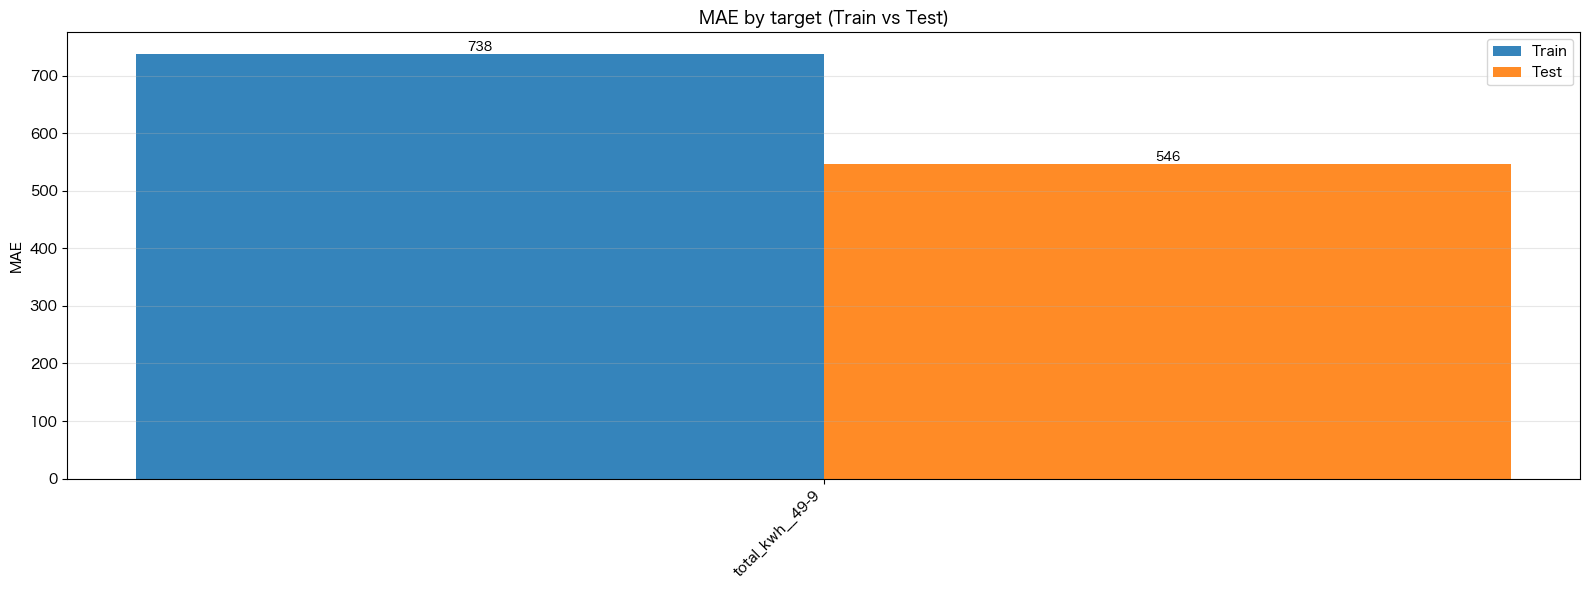

Area4 の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 35), Y_temp:(10896, 3))


/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


    → 温度モデルの残差メトリクス / 重要度プロット


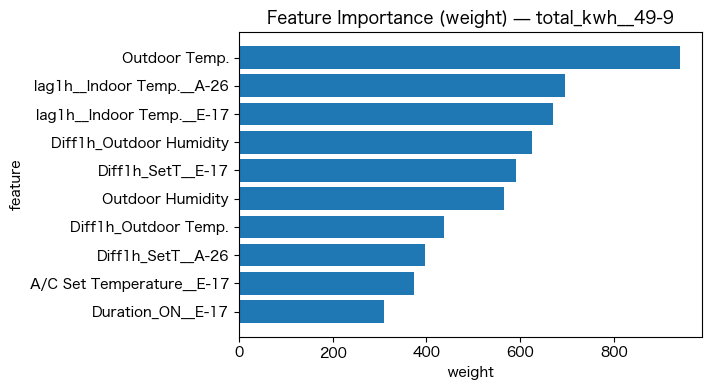

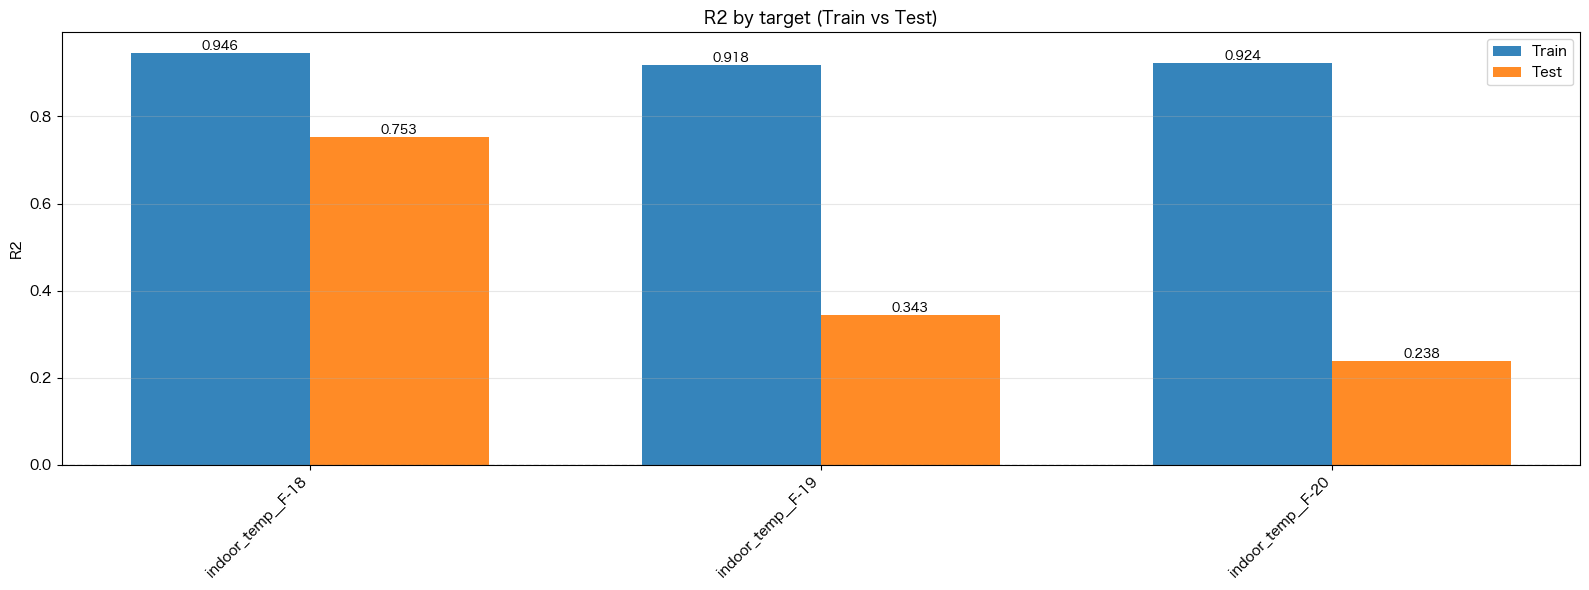

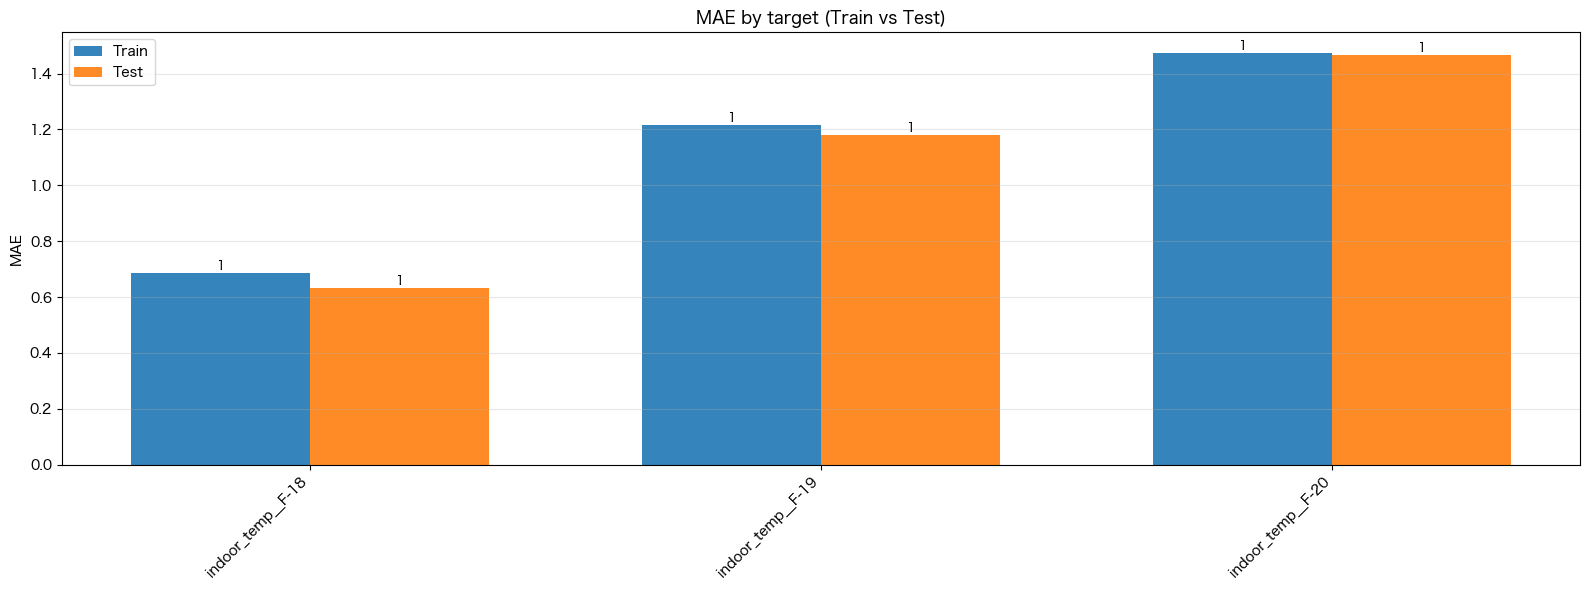

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  Step2: 消費電力モデル学習 (X:(10703, 38), Y_kwh:(10896, 2))
    → 消費電力モデルの残差メトリクス / 重要度プロット


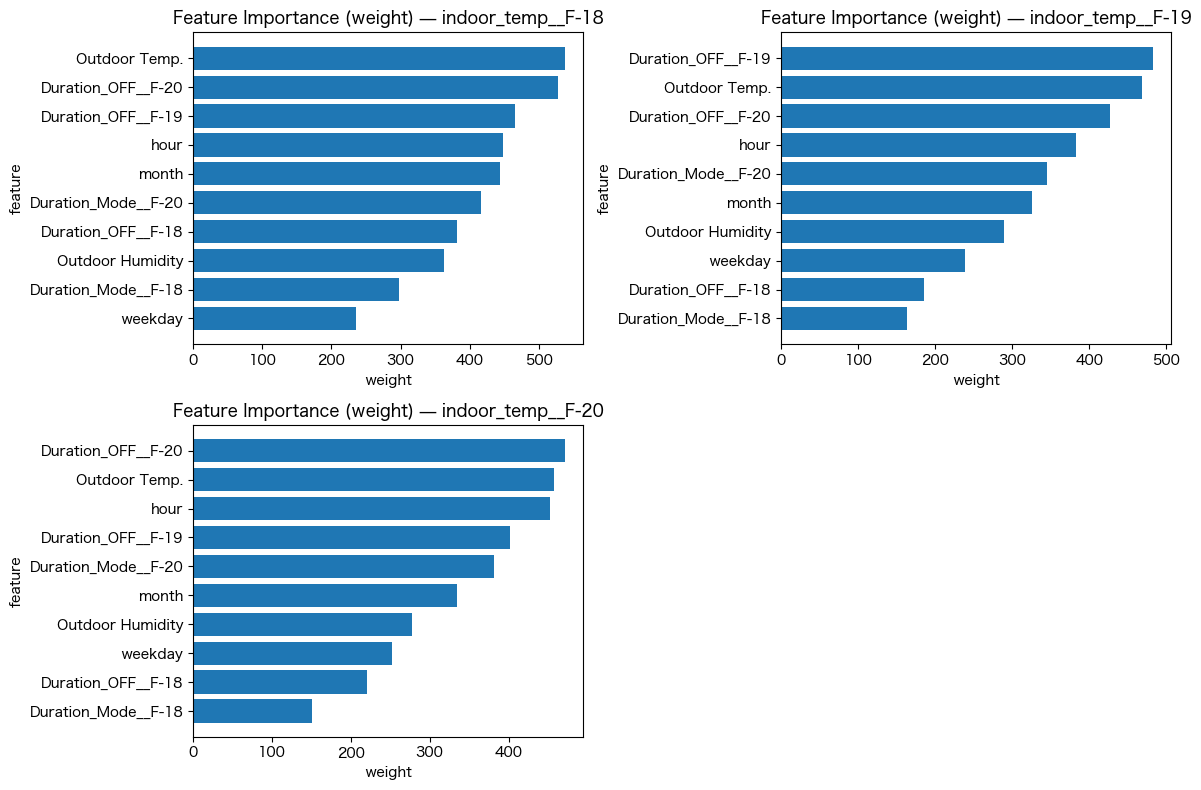

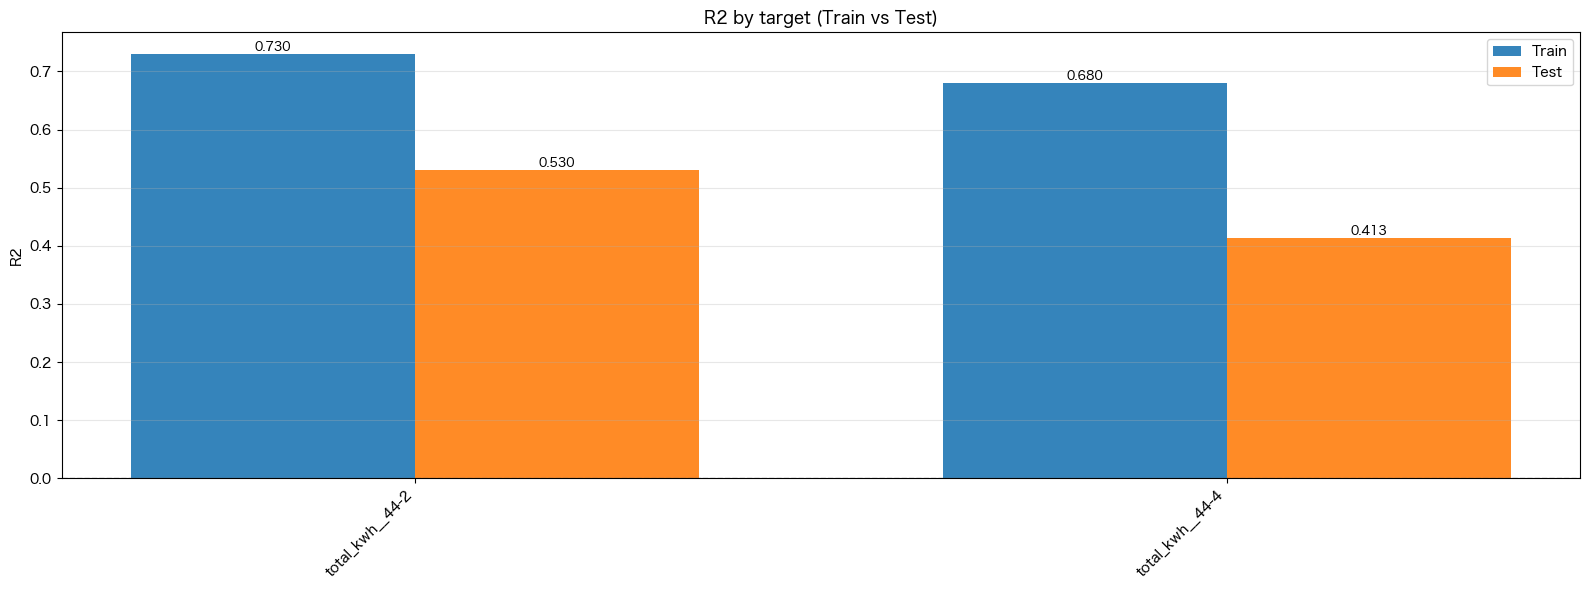

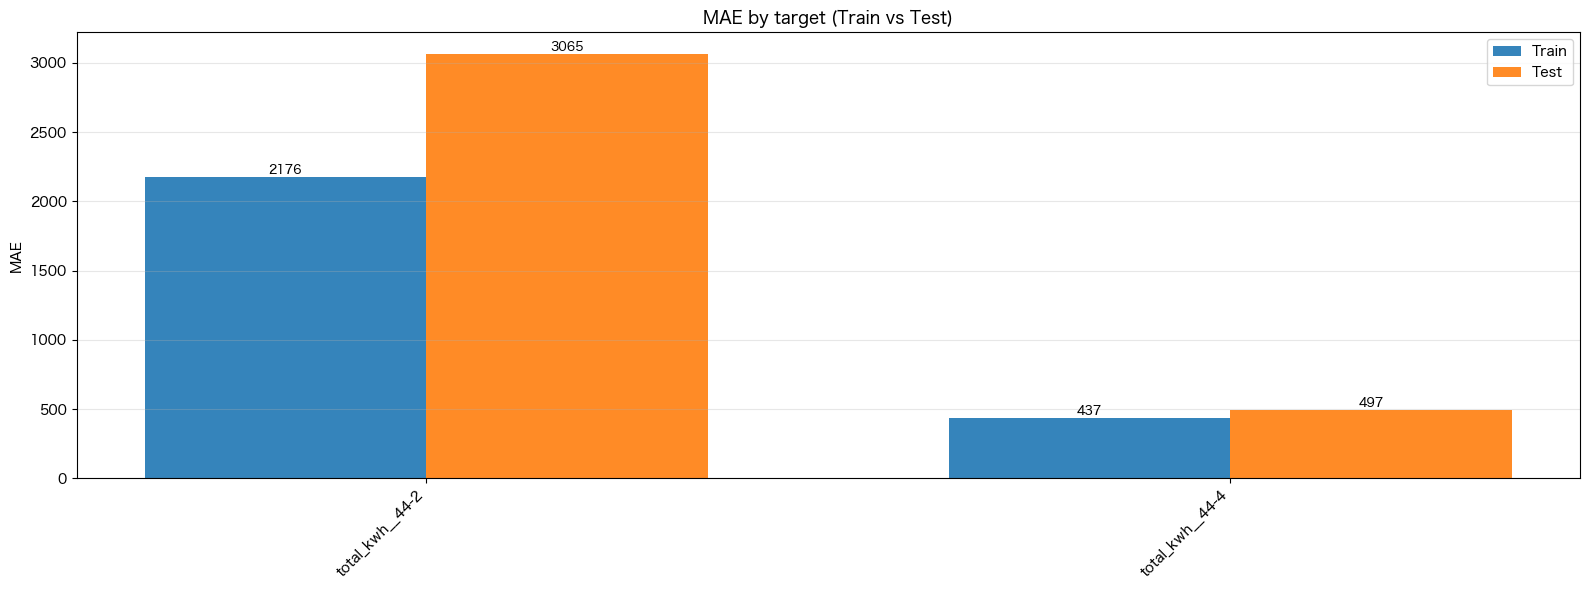

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


MeetingRoom の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 26), Y_temp:(10896, 2))
    → 温度モデルの残差メトリクス / 重要度プロット


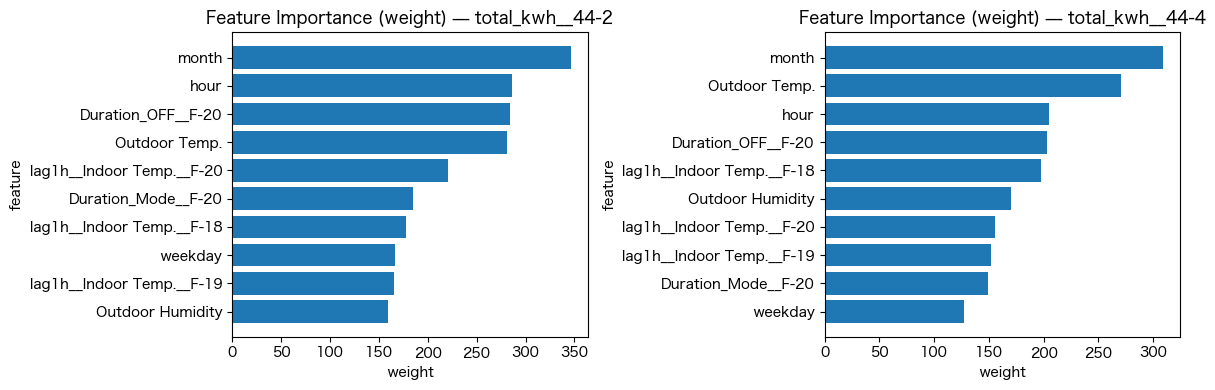

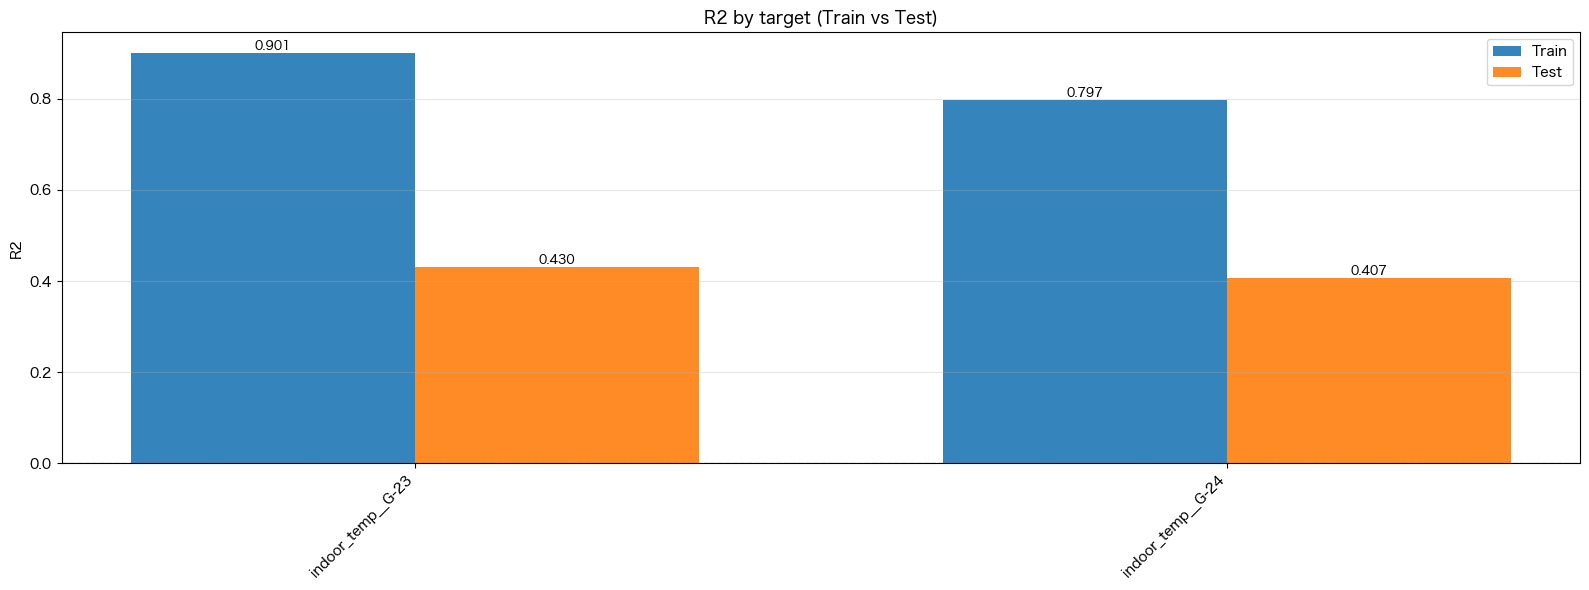

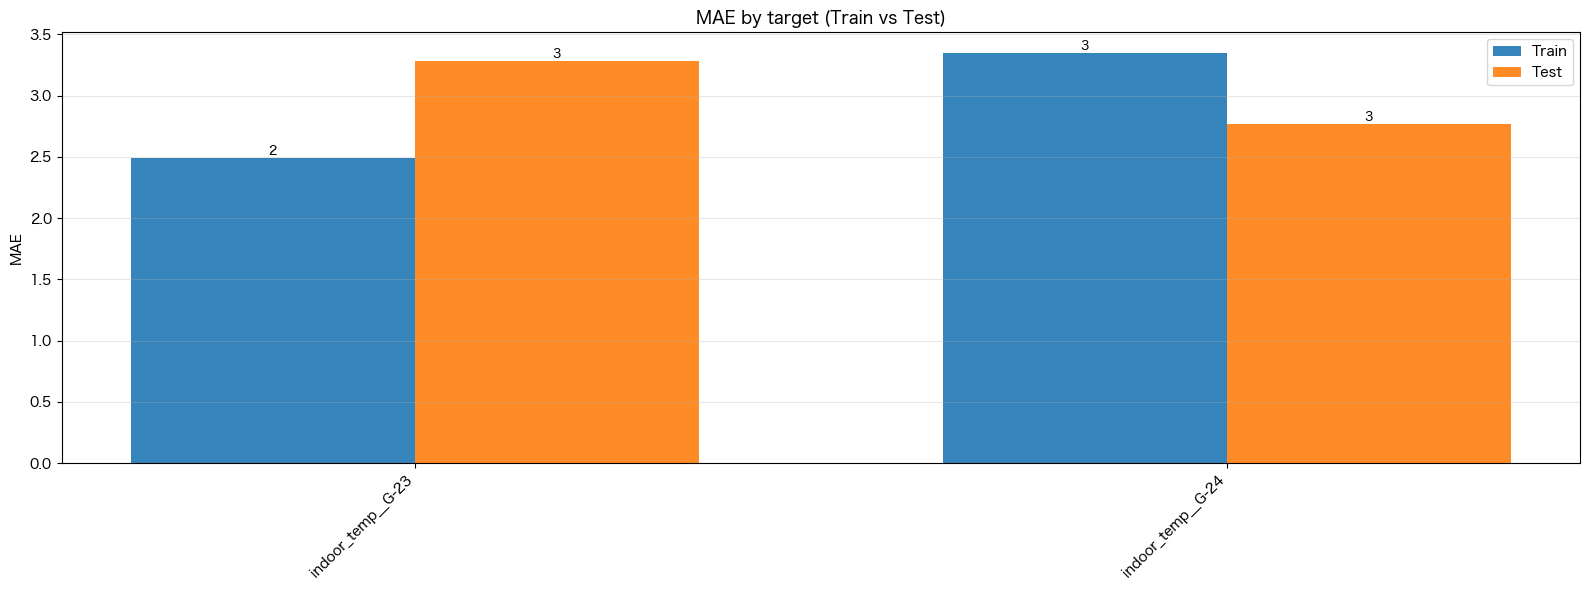

  Step2: 消費電力モデル学習 (X:(10703, 28), Y_kwh:(10896, 1))
    → 消費電力モデルの残差メトリクス / 重要度プロット


/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


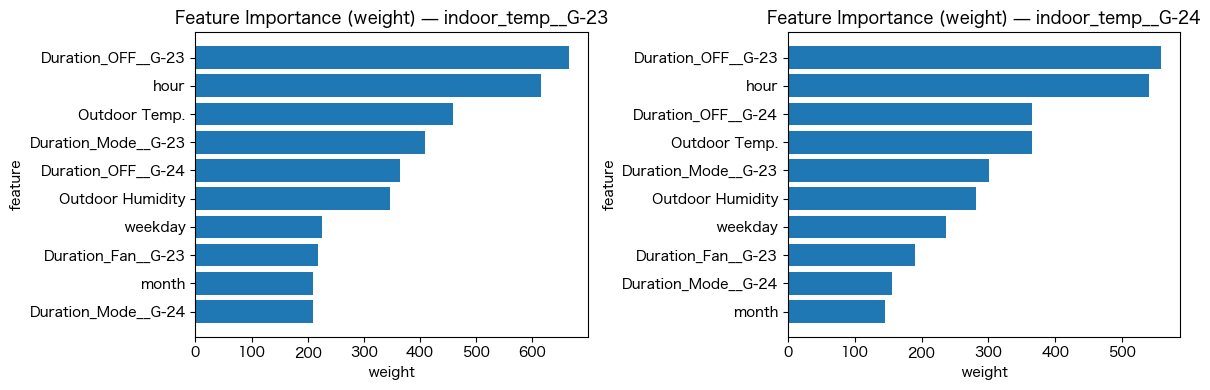

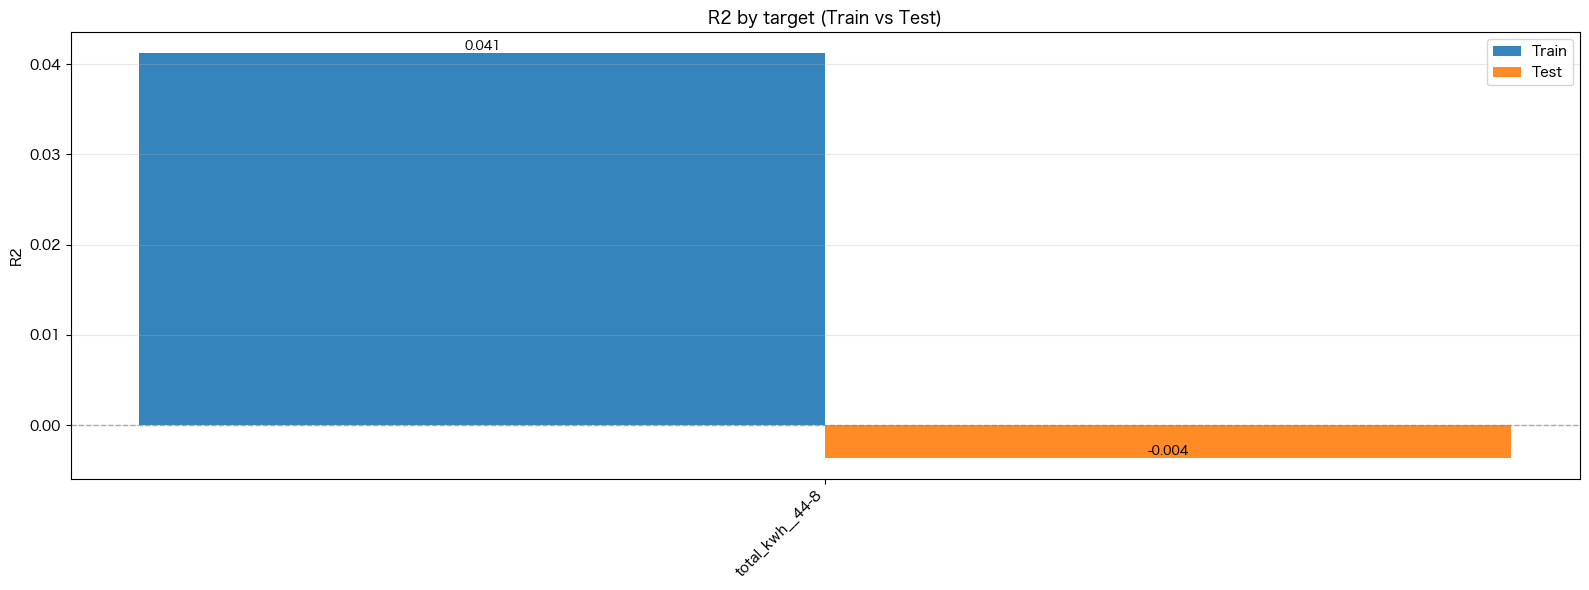

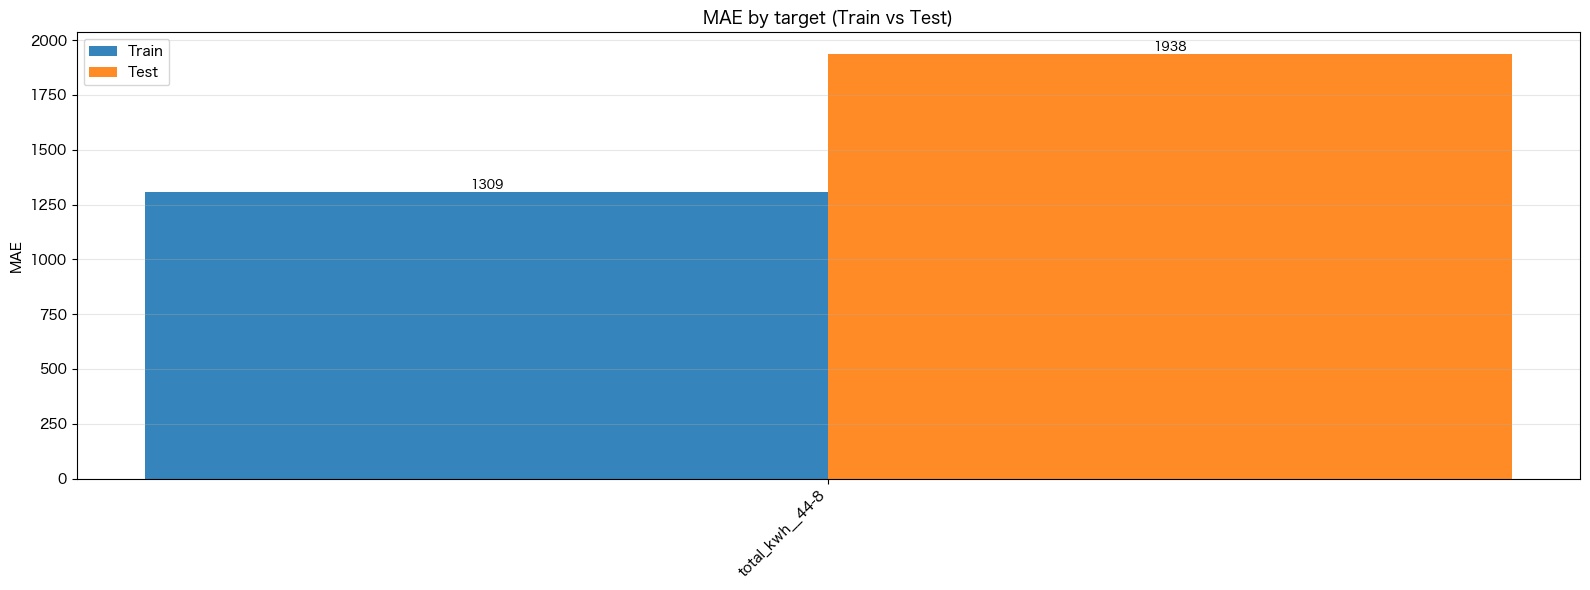

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


BreakRoom の2段階学習中...
  Step1: 温度モデル学習 (X:(10703, 26), Y_temp:(10896, 2))
    → 温度モデルの残差メトリクス / 重要度プロット


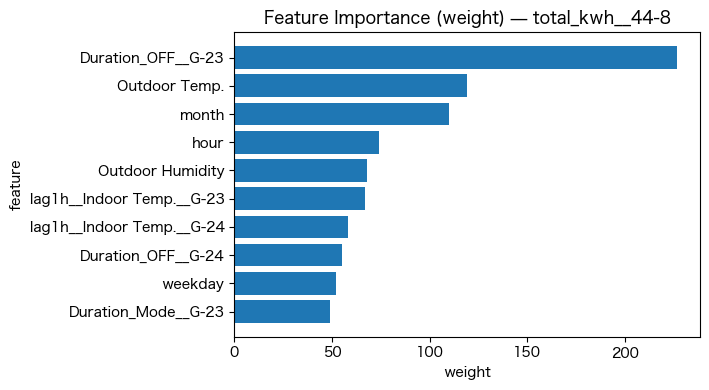

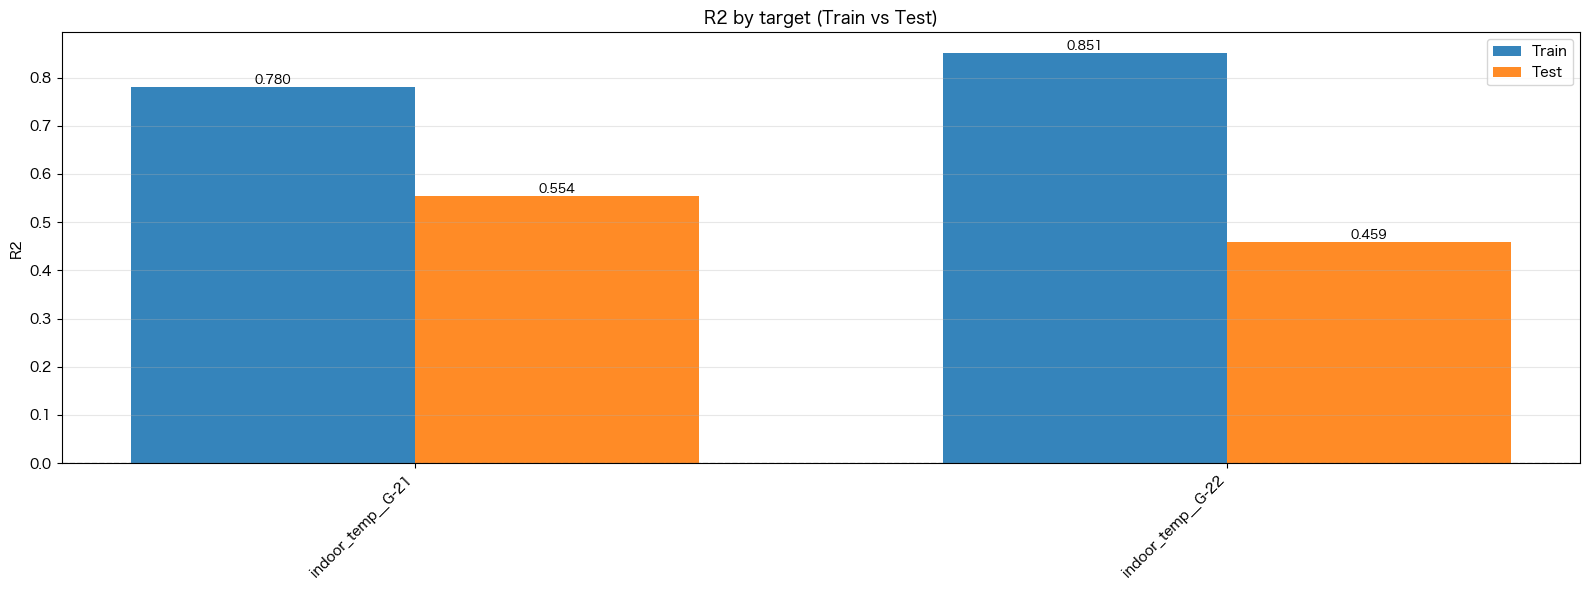

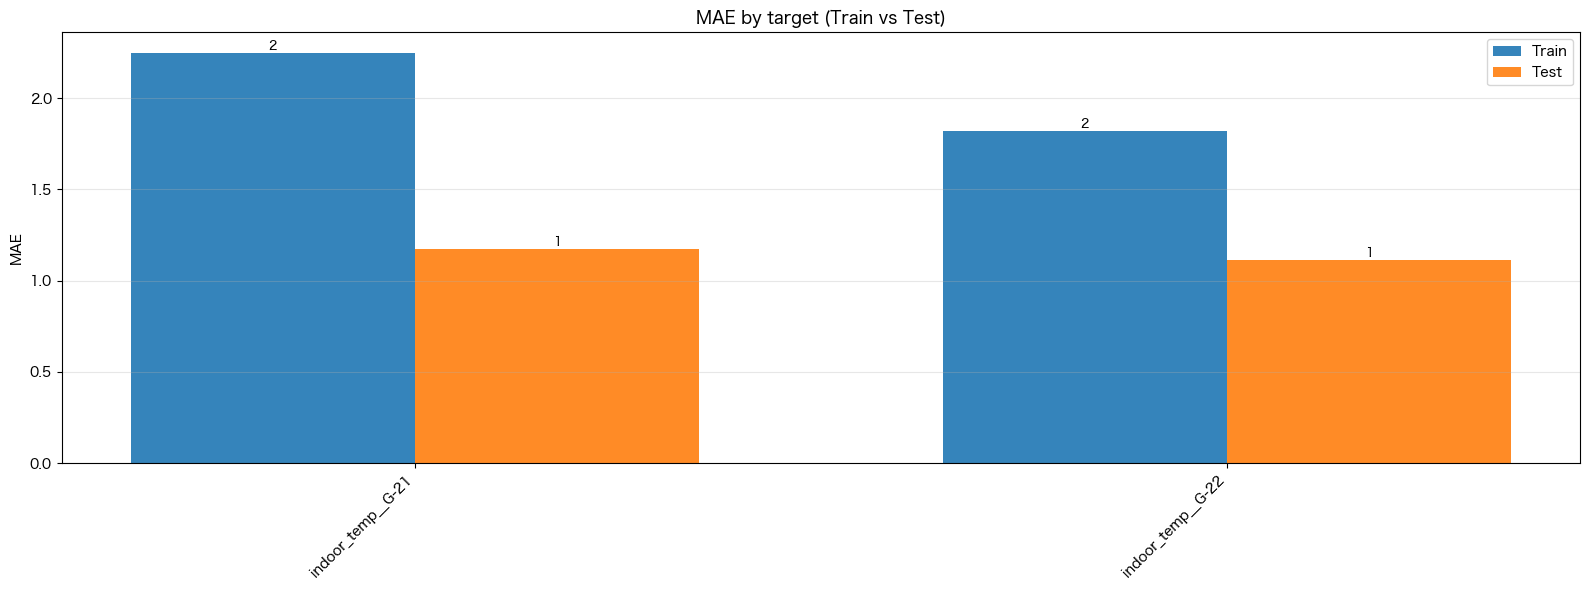

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  Step2: 消費電力モデル学習 (X:(10703, 28), Y_kwh:(10896, 1))
    → 消費電力モデルの残差メトリクス / 重要度プロット


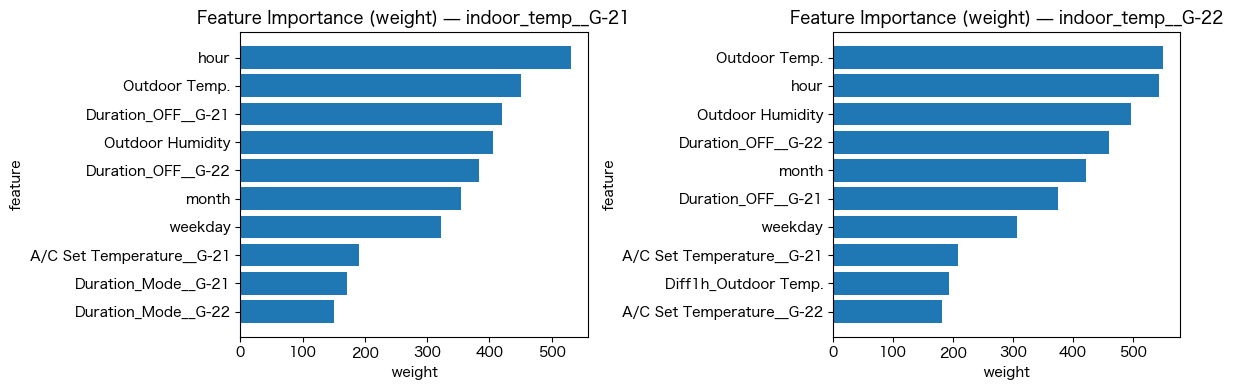

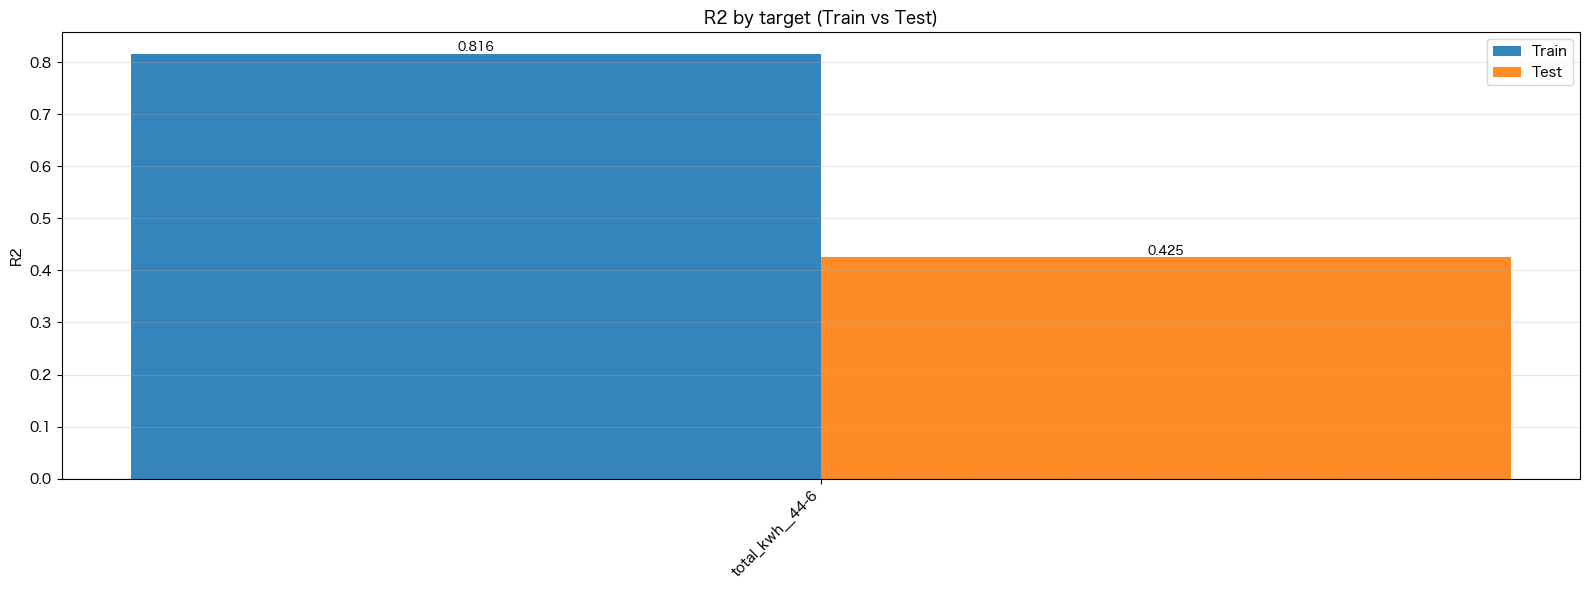

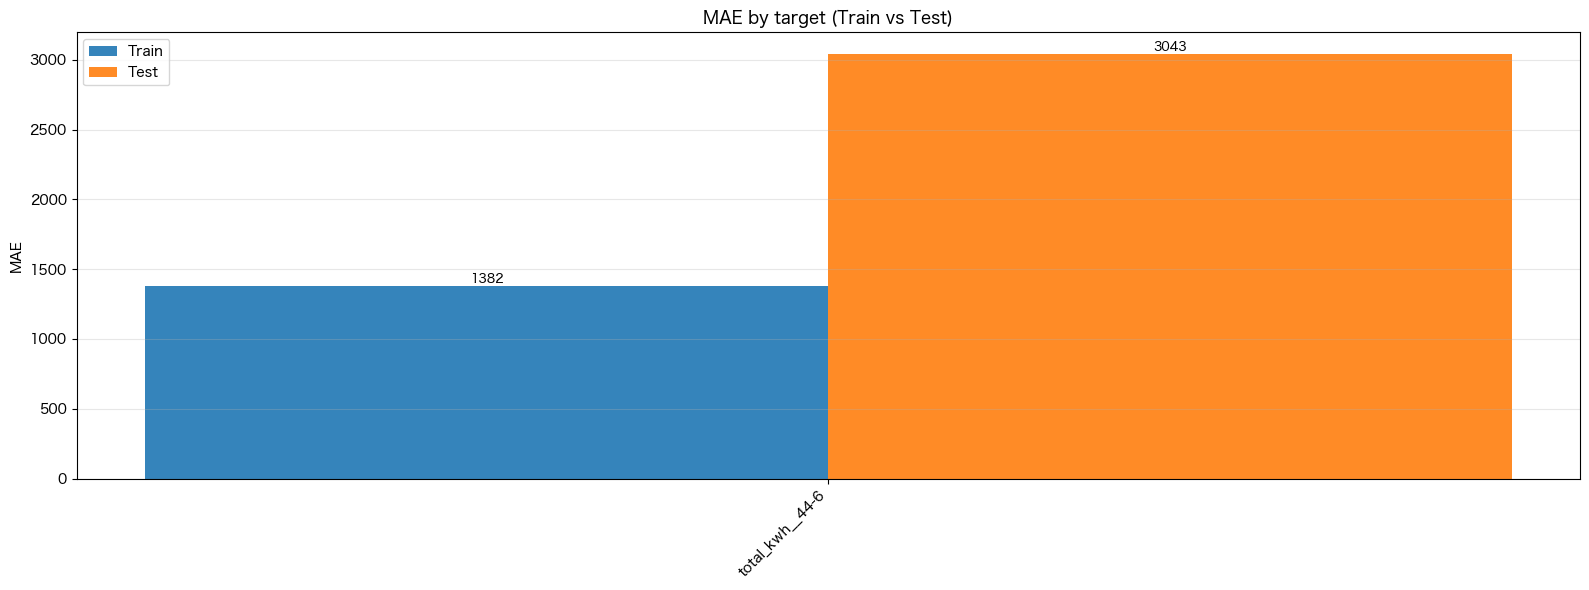

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


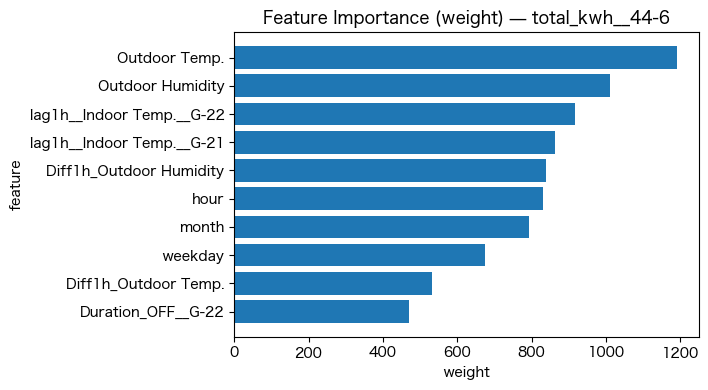

In [4]:
AreaModelApi.learn_two_stage(area_unit_names, True)